In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.model_selection import train_test_split


# Pre Processing Data

In [2]:
model_data = pd.read_pickle("final_merged_data_daily_ver1.pkl")
model_data.head()

,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,maturity,gross_spread,offering_amt,offering_date,offering_price,offering_yield,principal_amt,coupon
0,00037BAB8,2019-03-20,ABB3852125,ABB,75000.0,99.96200,2.887133,2022-05-08,4.5,1250000.0,2012-05-03,97.833,3.12905,1000.0,2.875
1,00037BAB8,2019-03-21,ABB3852125,ABB,1305000.0,100.36900,2.750151,2022-05-08,4.5,1250000.0,2012-05-03,97.833,3.12905,1000.0,2.875
2,00037BAB8,2019-03-22,ABB3852125,ABB,1170000.0,100.30700,2.770905,2022-05-08,4.5,1250000.0,2012-05-03,97.833,3.12905,1000.0,2.875
3,00037BAB8,2019-03-25,ABB3852125,ABB,600000.0,100.78626,2.609905,2022-05-08,4.5,1250000.0,2012-05-03,97.833,3.12905,1000.0,2.875
4,00037BAB8,2019-03-26,ABB3852125,ABB,100000.0,100.66900,2.649010,2022-05-08,4.5,1250000.0,2012-05-03,97.833,3.12905,1000.0,2.875


In [3]:
model_data['trd_exctn_dt'].describe()

/var/tmp/ipykernel_643803/255980566.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  model_data['trd_exctn_dt'].describe()


count                 1345400
unique                   1580
top       2020-03-02 00:00:00
freq                     1799
first     2017-01-04 00:00:00
last      2022-09-01 00:00:00
Name: trd_exctn_dt, dtype: object

In [4]:
model_data = model_data[model_data['offering_yield'].notna()]
model_data.shape

(1325100, 15)

In [5]:
model_data['cusip_id'].value_counts().value_counts()

700    1893
Name: cusip_id, dtype: int64

In [6]:
# TRAINING DATA PRE PROCESSING 

model_data['offering_date'] = pd.to_datetime(model_data['offering_date'])
model_data['maturity'] = pd.to_datetime(model_data['maturity'])

# Step 2: Extract the offering year and month
model_data['offering_year'] = model_data['offering_date'].dt.year
model_data['offering_month'] = model_data['offering_date'].dt.month
model_data['maturity_year'] = model_data['maturity'].dt.year
model_data['maturity_month'] = model_data['maturity'].dt.month

# Step 3: Drop the original 'offering_date' column
model_data.drop(columns=['offering_date','maturity','gross_spread'], axis=1, inplace=True)

model_data.head(2)

,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,offering_year,offering_month,maturity_year,maturity_month
0,00037BAB8,2019-03-20,ABB3852125,ABB,75000.0,99.962,2.887133,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5
1,00037BAB8,2019-03-21,ABB3852125,ABB,1305000.0,100.369,2.750151,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5


In [7]:
import pandas as pd

# Ensure trd_exctn_dt is in datetime format
model_data['trd_exctn_dt'] = pd.to_datetime(model_data['trd_exctn_dt'])

# Extract year and month
model_data['exn_year'] = model_data['trd_exctn_dt'].dt.year
model_data['exn_month'] = model_data['trd_exctn_dt'].dt.month
model_data['exn_day'] = model_data['trd_exctn_dt'].dt.day
model_data

,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,offering_year,offering_month,maturity_year,maturity_month,exn_year,exn_month,exn_day
0,00037BAB8,2019-03-20,ABB3852125,ABB,75000.0,99.96200,2.887133,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,20
1,00037BAB8,2019-03-21,ABB3852125,ABB,1305000.0,100.36900,2.750151,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,21
2,00037BAB8,2019-03-22,ABB3852125,ABB,1170000.0,100.30700,2.770905,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,22
3,00037BAB8,2019-03-25,ABB3852125,ABB,600000.0,100.78626,2.609905,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,25
4,00037BAB8,2019-03-26,ABB3852125,ABB,100000.0,100.66900,2.649010,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345395,98978VAN3,2022-08-26,PFE4666688,PFE,210000.0,98.38700,4.208056,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,26
1345396,98978VAN3,2022-08-29,PFE4666688,PFE,1500000.0,98.03600,4.276044,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,29
1345397,98978VAN3,2022-08-30,PFE4666688,PFE,125000.0,98.04100,4.275075,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,30
1345398,98978VAN3,2022-08-31,PFE4666688,PFE,480000.0,97.87200,4.308006,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,31


In [8]:

# Ensure trd_exctn_dt is in datetime format
model_data['trd_exctn_dt'] = pd.to_datetime(model_data['trd_exctn_dt'])

# Extract year and month
model_data['exn_year'] = model_data['trd_exctn_dt'].dt.year
model_data['exn_month'] = model_data['trd_exctn_dt'].dt.month
model_data['exn_day'] = model_data['trd_exctn_dt'].dt.day
model_data


,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,offering_year,offering_month,maturity_year,maturity_month,exn_year,exn_month,exn_day
0,00037BAB8,2019-03-20,ABB3852125,ABB,75000.0,99.96200,2.887133,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,20
1,00037BAB8,2019-03-21,ABB3852125,ABB,1305000.0,100.36900,2.750151,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,21
2,00037BAB8,2019-03-22,ABB3852125,ABB,1170000.0,100.30700,2.770905,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,22
3,00037BAB8,2019-03-25,ABB3852125,ABB,600000.0,100.78626,2.609905,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,25
4,00037BAB8,2019-03-26,ABB3852125,ABB,100000.0,100.66900,2.649010,1250000.0,97.833,3.12905,1000.0,2.875,2012,5,2022,5,2019,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345395,98978VAN3,2022-08-26,PFE4666688,PFE,210000.0,98.38700,4.208056,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,26
1345396,98978VAN3,2022-08-29,PFE4666688,PFE,1500000.0,98.03600,4.276044,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,29
1345397,98978VAN3,2022-08-30,PFE4666688,PFE,125000.0,98.04100,4.275075,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,30
1345398,98978VAN3,2022-08-31,PFE4666688,PFE,480000.0,97.87200,4.308006,500000.0,99.811,3.92303,1000.0,3.900,2018,8,2028,8,2022,8,31


In [9]:
numerical_columns = ['entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month']


model_data[numerical_columns] = model_data[numerical_columns].astype(float)

# Outlier Handling

In [10]:
# def find_outliers(df):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
#     mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
#     return mask

In [11]:
def handle_outliers_per_bond(df, columns_to_check):
    def find_and_replace_outliers(column):
        # Handle initial NaNs
        column.fillna(method='ffill', inplace=True)

        # Outlier detection
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        if column.name == 'yld_pt':
            lower_bound = Q1 - 1.0 * IQR
            upper_bound = Q3 + 1.0 * IQR
        else:
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        outliers_mask = (column < lower_bound) | (column > upper_bound)
        column[outliers_mask] = None

        # Replace NaNs with previous non-NaN values
        column.fillna(method='ffill', inplace=True)

        # Handle any remaining NaNs (e.g., if the first value was an outlier)
        column.fillna(method='bfill', inplace=True)

        return column
    
    # Apply to specified columns
    for col in columns_to_check:
        df[col] = df.groupby('cusip_id')[col].apply(find_and_replace_outliers)
    
    return df

# Usage remains the same
columns_to_check = ['entrd_vol_qt', 'rptd_pr', 'yld_pt']
model_data = handle_outliers_per_bond(model_data, columns_to_check)


/var/tmp/ipykernel_643803/3852172101.py:29: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[col] = df.groupby('cusip_id')[col].apply(find_and_replace_outliers)
/var/tmp/ipykernel_643803/3852172101.py:29: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[col] = df.groupby('cusip_id')[col].apply(f

In [12]:
# Check for NaNs in the entire DataFrame
if model_data.isna().any().any():
    print("There are NaNs in the DataFrame.")

# Check for NaNs in specific columns
columns_to_check = ['entrd_vol_qt', 'rptd_pr', 'yld_pt']
if model_data[columns_to_check].isna().any().any():
    print("There are NaNs in the specified columns.")

# Get the count of NaNs in each column
na_counts = model_data.isna().sum()
print(na_counts)


cusip_id          0
trd_exctn_dt      0
bond_sym_id       0
company_symbol    0
entrd_vol_qt      0
rptd_pr           0
yld_pt            0
offering_amt      0
offering_price    0
offering_yield    0
principal_amt     0
coupon            0
offering_year     0
offering_month    0
maturity_year     0
maturity_month    0
exn_year          0
exn_month         0
exn_day           0
dtype: int64


In [13]:
model_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day'],
      dtype='object')

In [14]:
model_data.to_pickle('model_data_itr2_wogvkeys.pkl')

In [15]:
model_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day'],
      dtype='object')

In [16]:
# unique_company_symbols = model_data['company_symbol'].unique()
# print(unique_company_symbols)


In [17]:
# unique_company_symbols = model_data['company_symbol'].unique()

# # Join the unique symbols with a space separator
# company_symbols_string = ' '.join(unique_company_symbols.astype(str))

# # Write to a text file
# with open('company_codes.txt', 'w') as file:
#     file.write(company_symbols_string)


In [18]:
# model_data = pd.read_pickle('model_data_itr2_wogvkeys.pkl')

# Company Financials

In [19]:
model_data['cusip_id'].nunique()

1893

In [20]:
# https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/ratings/

# https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/crspcompustat-merged/fundamentals-quarterly/


company_deets = pd.read_csv(r'company_deets_tic.zip',compression = 'zip')

In [21]:
company_deets.columns

Index(['GVKEY', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'conm', 'curcdq', 'datacqtr', 'datafqtr', 'actq',
       'ceqq', 'chq', 'dlcq', 'dpactq', 'findlcq', 'uceqq', 'costat', 'prchq',
       'prclq', 'sic', 'spcsrc'],
      dtype='object')

important links 
https://wrds-www.wharton.upenn.edu/pages/get-data/financial-ratios-suite-wrds/financial-ratios/financial-ratios-firm-level-by-wrds-beta/

In [22]:
company_deets.head()

,GVKEY,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,conm,...,chq,dlcq,dpactq,findlcq,uceqq,costat,prchq,prclq,sic,spcsrc
0,1078,2016-06-30,2016,2,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,2578.0,2896.0,6886.0,NaN,NaN,A,44.58,36.76,3845,B+
1,1078,2016-09-30,2016,3,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,2500.0,2535.0,6718.0,NaN,NaN,A,45.79,39.16,3845,B+
2,1078,2016-12-31,2016,4,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,18620.0,1325.0,6661.0,NaN,NaN,A,43.78,37.38,3845,B+
3,1078,2017-03-31,2017,1,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,8706.0,210.0,6907.0,NaN,NaN,A,45.84,38.34,3845,B+
4,1078,2017-06-30,2017,2,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,9675.0,221.0,7190.0,NaN,NaN,A,49.59,42.31,3845,B+


In [23]:
company_deets['tic'].nunique()

390

In [24]:
# Ensure trd_exctn_dt is in datetime format
company_deets['datadate'] = pd.to_datetime(company_deets['datadate'])

latest_c_deets = company_deets[company_deets['datadate'].dt.year >= 2016]

latest_c_deets


,GVKEY,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,conm,...,chq,dlcq,dpactq,findlcq,uceqq,costat,prchq,prclq,sic,spcsrc
0,1078,2016-06-30,2016,2,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,2578.0,2896.0,6886.0,NaN,NaN,A,44.58,36.76,3845,B+
1,1078,2016-09-30,2016,3,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,2500.0,2535.0,6718.0,NaN,NaN,A,45.79,39.16,3845,B+
2,1078,2016-12-31,2016,4,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,18620.0,1325.0,6661.0,NaN,NaN,A,43.78,37.38,3845,B+
3,1078,2017-03-31,2017,1,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,8706.0,210.0,6907.0,NaN,NaN,A,45.84,38.34,3845,B+
4,1078,2017-06-30,2017,2,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,...,9675.0,221.0,7190.0,NaN,NaN,A,49.59,42.31,3845,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,294524,2022-06-30,2022,2,INDL,C,D,STD,LYB,LYONDELLBASELL INDUSTRIES NV,...,1057.0,405.0,7923.0,NaN,NaN,A,117.22,83.50,2820,B+
11092,294524,2022-09-30,2022,3,INDL,C,D,STD,LYB,LYONDELLBASELL INDUSTRIES NV,...,1480.0,439.0,7817.0,NaN,NaN,A,92.52,71.46,2820,B+
11093,294524,2022-12-31,2022,4,INDL,C,D,STD,LYB,LYONDELLBASELL INDUSTRIES NV,...,2151.0,1125.0,8337.0,NaN,NaN,A,89.60,75.24,2820,B+
11094,294524,2023-03-31,2023,1,INDL,C,D,STD,LYB,LYONDELLBASELL INDUSTRIES NV,...,1790.0,775.0,8729.0,NaN,NaN,A,101.30,81.24,2820,B+


In [25]:
latest_c_deets.columns

Index(['GVKEY', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'conm', 'curcdq', 'datacqtr', 'datafqtr', 'actq',
       'ceqq', 'chq', 'dlcq', 'dpactq', 'findlcq', 'uceqq', 'costat', 'prchq',
       'prclq', 'sic', 'spcsrc'],
      dtype='object')

In [26]:

model_data['company_symbol'] = model_data['company_symbol'].astype(str)
latest_c_deets['tic'] = latest_c_deets['tic'].astype(str)

# Extract the year and month from 'datadate'
latest_c_deets['year'] = latest_c_deets['datadate'].dt.year
latest_c_deets['month'] = latest_c_deets['datadate'].dt.month




In [27]:


# Create column for the quarter of trd_exctn_dt
model_data['trd_quarter'] = model_data['trd_exctn_dt'].dt.quarter

# Create columns for the previous quarter and its year
def get_previous_quarter(year, quarter):
    if quarter == 1:
        return year - 1, 4
    else:
        return year, quarter - 1

model_data['match_year'], model_data['match_quarter'] = zip(*model_data.apply(lambda x: get_previous_quarter(x['trd_exctn_dt'].year, x['trd_quarter']), axis=1))




In [28]:
model_data

,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,...,offering_year,offering_month,maturity_year,maturity_month,exn_year,exn_month,exn_day,trd_quarter,match_year,match_quarter
0,00037BAB8,2019-03-20,ABB3852125,ABB,75000.0,99.96200,2.887133,1250000.0,97.833,3.12905,...,2012.0,5.0,2022.0,5.0,2019,3,20,1,2018,4
1,00037BAB8,2019-03-21,ABB3852125,ABB,1305000.0,100.36900,2.750151,1250000.0,97.833,3.12905,...,2012.0,5.0,2022.0,5.0,2019,3,21,1,2018,4
2,00037BAB8,2019-03-22,ABB3852125,ABB,1170000.0,100.30700,2.770905,1250000.0,97.833,3.12905,...,2012.0,5.0,2022.0,5.0,2019,3,22,1,2018,4
3,00037BAB8,2019-03-25,ABB3852125,ABB,600000.0,100.78626,2.609905,1250000.0,97.833,3.12905,...,2012.0,5.0,2022.0,5.0,2019,3,25,1,2018,4
4,00037BAB8,2019-03-26,ABB3852125,ABB,100000.0,100.66900,2.649010,1250000.0,97.833,3.12905,...,2012.0,5.0,2022.0,5.0,2019,3,26,1,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345395,98978VAN3,2022-08-26,PFE4666688,PFE,210000.0,98.38700,4.208056,500000.0,99.811,3.92303,...,2018.0,8.0,2028.0,8.0,2022,8,26,3,2022,2
1345396,98978VAN3,2022-08-29,PFE4666688,PFE,1500000.0,98.03600,4.276044,500000.0,99.811,3.92303,...,2018.0,8.0,2028.0,8.0,2022,8,29,3,2022,2
1345397,98978VAN3,2022-08-30,PFE4666688,PFE,125000.0,98.04100,4.275075,500000.0,99.811,3.92303,...,2018.0,8.0,2028.0,8.0,2022,8,30,3,2022,2
1345398,98978VAN3,2022-08-31,PFE4666688,PFE,480000.0,97.87200,4.308006,500000.0,99.811,3.92303,...,2018.0,8.0,2028.0,8.0,2022,8,31,3,2022,2


In [29]:

latest_c_deets['fqtr'] = latest_c_deets['fqtr'].astype(int)

# Merge the dataframes
merged_data = pd.merge(model_data, latest_c_deets, left_on=['company_symbol', 'match_year', 'match_quarter'], right_on=['tic', 'fyearq', 'fqtr'], how='left')

# Cleanup: If necessary, drop duplicated columns or rename for clarity.

In [30]:
latest_c_deets['tic'].nunique()

390

In [31]:
merged_data['company_symbol'].nunique()

520

In [32]:
latest_c_deets.columns

Index(['GVKEY', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'conm', 'curcdq', 'datacqtr', 'datafqtr', 'actq',
       'ceqq', 'chq', 'dlcq', 'dpactq', 'findlcq', 'uceqq', 'costat', 'prchq',
       'prclq', 'sic', 'spcsrc', 'year', 'month'],
      dtype='object')

In [33]:
merged_data['datadate'].isna().value_counts()

False    1076949
True      248151
Name: datadate, dtype: int64

In [34]:
merged_data = merged_data[merged_data['datadate'].notna()]
merged_data.shape

(1076949, 49)

In [35]:
merged_data['cusip_id'].nunique()

1567

In [36]:
merged_data['company_symbol'].nunique()

389

In [37]:

empty_row_percentages = (merged_data.isnull().sum() / len(merged_data)) * 100

# Print the percentage of empty rows in each column
for column, percentage in empty_row_percentages.iteritems():
    print(f"Percentage of empty rows in {column}: {percentage}%")
    # print(f"Unique values {column}: {company_deets[column].nunique()}")


Percentage of empty rows in cusip_id: 0.0%
Percentage of empty rows in trd_exctn_dt: 0.0%
Percentage of empty rows in bond_sym_id: 0.0%
Percentage of empty rows in company_symbol: 0.0%
Percentage of empty rows in entrd_vol_qt: 0.0%
Percentage of empty rows in rptd_pr: 0.0%
Percentage of empty rows in yld_pt: 0.0%
Percentage of empty rows in offering_amt: 0.0%
Percentage of empty rows in offering_price: 0.0%
Percentage of empty rows in offering_yield: 0.0%
Percentage of empty rows in principal_amt: 0.0%
Percentage of empty rows in coupon: 0.0%
Percentage of empty rows in offering_year: 0.0%
Percentage of empty rows in offering_month: 0.0%
Percentage of empty rows in maturity_year: 0.0%
Percentage of empty rows in maturity_month: 0.0%
Percentage of empty rows in exn_year: 0.0%
Percentage of empty rows in exn_month: 0.0%
Percentage of empty rows in exn_day: 0.0%
Percentage of empty rows in trd_quarter: 0.0%
Percentage of empty rows in match_year: 0.0%
Percentage of empty rows in match_qua

/var/tmp/ipykernel_643803/172658158.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in empty_row_percentages.iteritems():


In [38]:
merged_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day', 'trd_quarter', 'match_year', 'match_quarter',
       'GVKEY', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'conm', 'curcdq', 'datacqtr', 'datafqtr', 'actq',
       'ceqq', 'chq', 'dlcq', 'dpactq', 'findlcq', 'uceqq', 'costat', 'prchq',
       'prclq', 'sic', 'spcsrc', 'year', 'month'],
      dtype='object')

In [39]:
merged_data.shape

(1076949, 49)

In [40]:
# Removing rows without ratings

merged_data = merged_data[merged_data['spcsrc'].notna()]
merged_data.shape

(944620, 49)

In [41]:


# Count the number of rows for each 'cusip_id'
cusip_counts = merged_data['cusip_id'].value_counts()

# Get the 'cusip_id' values that have at least 250 rows
valid_cusip_ids = cusip_counts[cusip_counts >= 700].index

# Filter the dataframe to include only the valid 'cusip_id' values
merged_data = merged_data[merged_data['cusip_id'].isin(valid_cusip_ids)]

# Sort the dataframe by date in descending order within each 'cusip_id' group
merged_data.sort_values(by='trd_exctn_dt', ascending=False, inplace=True)

# Group the dataframe by 'cusip_id' and select the top 250 rows for each group
training_data = merged_data.groupby('cusip_id').head(700)

training_data.shape


(926100, 49)

In [42]:
training_data['cusip_id'].value_counts().value_counts()

700    1323
Name: cusip_id, dtype: int64

In [43]:
columns_to_remove = ['indfmt', 'consol', 'popsrc', 'datafmt', 'curcdq', 'datacqtr', 'datafqtr', 'costat', 'prclq','fqtr','findlcq','uceqq','dpactq','actq']

training_data = training_data.drop(columns=columns_to_remove)

In [44]:
training_data.shape

(926100, 35)

In [45]:
training_data['cusip_id'].value_counts().value_counts()

700    1323
Name: cusip_id, dtype: int64

# Imputation

In [46]:
training_data.shape

(926100, 35)

In [47]:

empty_row_percentages = (training_data.isnull().sum() / len(training_data)) * 100

# Print the percentage of empty rows in each column
for column, percentage in empty_row_percentages.iteritems():
    print(f"Percentage of empty rows in {column}: {percentage}%")
    # print(f"Unique values {column}: {company_deets[column].nunique()}")


Percentage of empty rows in cusip_id: 0.0%
Percentage of empty rows in trd_exctn_dt: 0.0%
Percentage of empty rows in bond_sym_id: 0.0%
Percentage of empty rows in company_symbol: 0.0%
Percentage of empty rows in entrd_vol_qt: 0.0%
Percentage of empty rows in rptd_pr: 0.0%
Percentage of empty rows in yld_pt: 0.0%
Percentage of empty rows in offering_amt: 0.0%
Percentage of empty rows in offering_price: 0.0%
Percentage of empty rows in offering_yield: 0.0%
Percentage of empty rows in principal_amt: 0.0%
Percentage of empty rows in coupon: 0.0%
Percentage of empty rows in offering_year: 0.0%
Percentage of empty rows in offering_month: 0.0%
Percentage of empty rows in maturity_year: 0.0%
Percentage of empty rows in maturity_month: 0.0%
Percentage of empty rows in exn_year: 0.0%
Percentage of empty rows in exn_month: 0.0%
Percentage of empty rows in exn_day: 0.0%
Percentage of empty rows in trd_quarter: 0.0%
Percentage of empty rows in match_year: 0.0%
Percentage of empty rows in match_qua

/var/tmp/ipykernel_643803/4063504821.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in empty_row_percentages.iteritems():


In [48]:
# List of columns to impute
columns_to_impute = ["ceqq", "chq", "dlcq", "prchq"]

# Apply the group-wise mean imputation
for column in columns_to_impute:
    training_data[column] = training_data.groupby('tic')[column].transform(lambda group: group.fillna(group.mean()))

# Apply the global mean imputation to any remaining missing values
for column in columns_to_impute:
    training_data[column].fillna(training_data[column].mean(), inplace=True)


In [49]:

empty_row_percentages = (training_data.isnull().sum() / len(training_data)) * 100

# Print the percentage of empty rows in each column
for column, percentage in empty_row_percentages.iteritems():
    if percentage >0:
        print(f"Percentage of empty rows in {column}: {percentage}%")
    # print(f"Unique values {column}: {company_deets[column].nunique()}")


/var/tmp/ipykernel_643803/2166045754.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in empty_row_percentages.iteritems():


In [50]:
training_data.shape

(926100, 35)

# Feature Engineering

## Micro Factors

In [51]:

import ta

df = training_data.copy()

# Function to compute lag features for 'yld_pt'
def compute_lag_features(group):
    for i in range(1, 8):  # For lags 1 to 7
        group[f'yld_pt_lag{i}'] = group['yld_pt'].shift(i)
    return group

# Function to compute technical indicators for 'rptd_pr'
def compute_technical_indicators(group):
    # SMA for 7, 14 days
    group['sma_7'] = ta.trend.SMAIndicator(group['rptd_pr'], window=7).sma_indicator()
    group['sma_14'] = ta.trend.SMAIndicator(group['rptd_pr'], window=14).sma_indicator()
    
    # RSI for 14 days
    group['rsi_14'] = ta.momentum.RSIIndicator(group['rptd_pr'], window=14).rsi()
    
    # MACD
    macd = ta.trend.MACD(group['rptd_pr'])
    group['macd'] = macd.macd()
    group['macd_signal'] = macd.macd_signal()
    group['macd_diff'] = macd.macd_diff()
    
    return group

# Function to compute all features for a bond group
def compute_features(group):
    group = compute_lag_features(group)
    group = compute_technical_indicators(group)
    return group

# Group by 'cusip_id' and apply the custom function
df = df.groupby('cusip_id').apply(compute_features)

# Reset index
df.reset_index(drop=True, inplace=True)

# Save the modified dataframe to a new CSV file, if needed
# df.to_csv('modified_data.csv', index=False)


/var/tmp/ipykernel_643803/3983350486.py:35: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('cusip_id').apply(compute_features)


In [52]:
df.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day', 'trd_quarter', 'match_year', 'match_quarter',
       'GVKEY', 'datadate', 'fyearq', 'tic', 'conm', 'ceqq', 'chq', 'dlcq',
       'prchq', 'sic', 'spcsrc', 'year', 'month', 'yld_pt_lag1', 'yld_pt_lag2',
       'yld_pt_lag3', 'yld_pt_lag4', 'yld_pt_lag5', 'yld_pt_lag6',
       'yld_pt_lag7', 'sma_7', 'sma_14', 'rsi_14', 'macd', 'macd_signal',
       'macd_diff'],
      dtype='object')

In [53]:
df = df.fillna(0)

In [54]:
df.head()

,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,...,yld_pt_lag4,yld_pt_lag5,yld_pt_lag6,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff
0,98978VAN3,2022-09-01,PFE4666688,PFE,400000.0,97.148,4.450082,500000.0,99.811,3.92303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00164VAE3,2022-09-01,AMCX4520745,AMCX,500000.0,93.730,7.271617,800000.0,100.000,4.75000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,149123CC3,2022-09-01,CAT4123606,CAT,300000.0,99.480,3.717725,1000000.0,99.983,3.40208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,02209SBE2,2022-09-01,MO4797930,MO,1500000.0,99.348,5.540197,2000000.0,99.765,5.82004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,037833CG3,2022-09-01,AAPL4452439,AAPL,3199000.0,99.104,3.644960,1750000.0,99.956,3.00702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:

empty_row_percentages = (df.isnull().sum() / len(df)) * 100

# Print the percentage of empty rows in each column
for column, percentage in empty_row_percentages.iteritems():
    if percentage > 0:
        print(f"Percentage of empty rows in {column}: {percentage}%")


/var/tmp/ipykernel_643803/417820285.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in empty_row_percentages.iteritems():


In [56]:
training_data = df.copy()
training_data.shape

(926100, 48)

In [57]:
training_data[training_data['cusip_id']=='98978VAN3']

,cusip_id,trd_exctn_dt,bond_sym_id,company_symbol,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,...,yld_pt_lag4,yld_pt_lag5,yld_pt_lag6,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff
0,98978VAN3,2022-09-01,PFE4666688,PFE,400000.0,97.14800,4.450082,500000.0,99.811,3.92303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1736,98978VAN3,2022-08-31,PFE4666688,PFE,480000.0,97.87200,4.308006,500000.0,99.811,3.92303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2405,98978VAN3,2022-08-30,PFE4666688,PFE,125000.0,98.04100,4.275075,500000.0,99.811,3.92303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3174,98978VAN3,2022-08-29,PFE4666688,PFE,1500000.0,98.03600,4.276044,500000.0,99.811,3.92303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4161,98978VAN3,2022-08-26,PFE4666688,PFE,210000.0,98.38700,4.208056,500000.0,99.811,3.92303,...,4.450082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857567,98978VAN3,2018-12-12,PFE4666688,PFE,315000.0,98.01325,4.150663,500000.0,99.811,3.92303,...,4.036037,4.075552,4.078991,4.255051,98.436893,98.618149,41.934606,-0.410071,-0.396732,-0.013339
857932,98978VAN3,2018-12-11,PFE4666688,PFE,150000.0,98.45700,4.093989,500000.0,99.811,3.92303,...,4.022825,4.036037,4.075552,4.078991,98.419464,98.593649,46.169105,-0.381717,-0.393729,0.012012
858697,98978VAN3,2018-12-07,PFE4666688,PFE,1000000.0,98.08800,4.140983,500000.0,99.811,3.92303,...,4.164985,4.022825,4.036037,4.075552,98.345464,98.511507,43.338794,-0.384588,-0.391901,0.007313
859125,98978VAN3,2018-12-06,PFE4666688,PFE,300000.0,97.61100,4.201955,500000.0,99.811,3.92303,...,4.149989,4.164985,4.022825,4.036037,98.159036,98.429007,39.931027,-0.420505,-0.397622,-0.022884


## Macro Factors

In [58]:
training_data.shape

(926100, 48)

In [59]:
training_data['trd_exctn_dt'].min()

Timestamp('2017-01-04 00:00:00')

In [60]:
training_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day', 'trd_quarter', 'match_year', 'match_quarter',
       'GVKEY', 'datadate', 'fyearq', 'tic', 'conm', 'ceqq', 'chq', 'dlcq',
       'prchq', 'sic', 'spcsrc', 'year', 'month', 'yld_pt_lag1', 'yld_pt_lag2',
       'yld_pt_lag3', 'yld_pt_lag4', 'yld_pt_lag5', 'yld_pt_lag6',
       'yld_pt_lag7', 'sma_7', 'sma_14', 'rsi_14', 'macd', 'macd_signal',
       'macd_diff'],
      dtype='object')

In [61]:
import pandas_datareader as pdr


# Define start and end dates
start_date = '2016-01-01'
end_date = '2022-12-31'

# Fetch U.S. GDP (quarterly)
gdp_data = pdr.get_data_fred('GDP', start_date, end_date)

# Fetch U.S. inflation rate (Consumer Price Index for All Urban Consumers: All Items, monthly)
cpi_data = pdr.get_data_fred('CPIAUCNS', start_date, end_date)

# Fetch U.S. central bank interest rates (Effective Federal Funds Rate, daily)
ffr_data = pdr.get_data_fred('DFF', start_date, end_date)




In [62]:
gdp_data['date_g'] = gdp_data.index
cpi_data['date_c'] = cpi_data.index
ffr_data['date_f'] = ffr_data.index

gdp_data.reset_index(drop=True, inplace=True)
cpi_data.reset_index(drop=True, inplace=True)
ffr_data.reset_index(drop=True, inplace=True)


In [63]:
gdp_data['year_g'] = pd.DatetimeIndex(gdp_data['date_g']).year
gdp_data['quarter_g'] = pd.DatetimeIndex(gdp_data['date_g']).quarter

cpi_data['year_c'] = pd.DatetimeIndex(cpi_data['date_c']).year
cpi_data['month_c'] = pd.DatetimeIndex(cpi_data['date_c']).month

ffr_data['year_f'] = pd.DatetimeIndex(ffr_data['date_f']).year
ffr_data['month_f'] = pd.DatetimeIndex(ffr_data['date_f']).month
ffr_data['day_f'] = pd.DatetimeIndex(ffr_data['date_f']).day


In [64]:
merged_data = pd.merge(training_data, gdp_data, left_on=['match_year', 'match_quarter'], right_on=['year_g', 'quarter_g'], how='left')
merged_data = pd.merge(merged_data, cpi_data, left_on=['exn_year', 'exn_month'], right_on=['year_c', 'month_c'], how='left')
merged_data = pd.merge(merged_data, ffr_data, left_on=['exn_year', 'exn_month', 'exn_day'], right_on=['year_f', 'month_f', 'day_f'], how='left')


In [65]:
training_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day', 'trd_quarter', 'match_year', 'match_quarter',
       'GVKEY', 'datadate', 'fyearq', 'tic', 'conm', 'ceqq', 'chq', 'dlcq',
       'prchq', 'sic', 'spcsrc', 'year', 'month', 'yld_pt_lag1', 'yld_pt_lag2',
       'yld_pt_lag3', 'yld_pt_lag4', 'yld_pt_lag5', 'yld_pt_lag6',
       'yld_pt_lag7', 'sma_7', 'sma_14', 'rsi_14', 'macd', 'macd_signal',
       'macd_diff'],
      dtype='object')

In [66]:
training_data.shape

(926100, 48)

In [67]:
merged_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day', 'trd_quarter', 'match_year', 'match_quarter',
       'GVKEY', 'datadate', 'fyearq', 'tic', 'conm', 'ceqq', 'chq', 'dlcq',
       'prchq', 'sic', 'spcsrc', 'year', 'month', 'yld_pt_lag1', 'yld_pt_lag2',
       'yld_pt_lag3', 'yld_pt_lag4', 'yld_pt_lag5', 'yld_pt_lag6',
       'yld_pt_lag7', 'sma_7', 'sma_14', 'rsi_14', 'macd', 'macd_signal',
       'macd_diff', 'GDP', 'date_g', 'year_g', 'quarter_g', 'CPIAUCNS',
       'date_c', 'year_c', 'month_c', 'DFF', 'date_f', 'year_f', 'month_f',
       'day_f'],
      dtype='object')

In [68]:
# Remove the extra columns from the merge
cols_to_remove = [  'date_g', 'year_g', 'quarter_g','date_c', 'year_c', 'month_c', 'date_f', 'year_f', 'month_f','day_f']
merged_data = merged_data.drop(columns=cols_to_remove)


In [69]:
merged_data.shape

(926100, 51)

In [70]:
training_data.shape

(926100, 48)

In [71]:
training_data = merged_data.copy()

In [72]:
training_data.columns

Index(['cusip_id', 'trd_exctn_dt', 'bond_sym_id', 'company_symbol',
       'entrd_vol_qt', 'rptd_pr', 'yld_pt', 'offering_amt', 'offering_price',
       'offering_yield', 'principal_amt', 'coupon', 'offering_year',
       'offering_month', 'maturity_year', 'maturity_month', 'exn_year',
       'exn_month', 'exn_day', 'trd_quarter', 'match_year', 'match_quarter',
       'GVKEY', 'datadate', 'fyearq', 'tic', 'conm', 'ceqq', 'chq', 'dlcq',
       'prchq', 'sic', 'spcsrc', 'year', 'month', 'yld_pt_lag1', 'yld_pt_lag2',
       'yld_pt_lag3', 'yld_pt_lag4', 'yld_pt_lag5', 'yld_pt_lag6',
       'yld_pt_lag7', 'sma_7', 'sma_14', 'rsi_14', 'macd', 'macd_signal',
       'macd_diff', 'GDP', 'CPIAUCNS', 'DFF'],
      dtype='object')

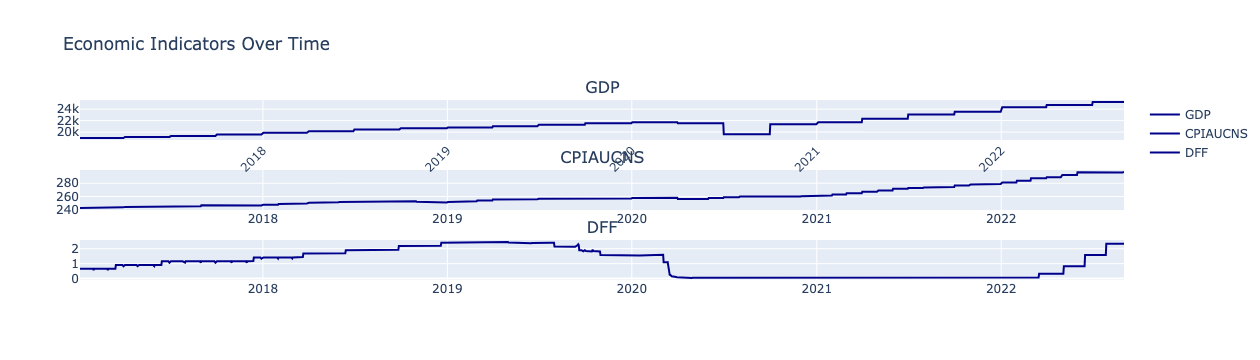

In [76]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data read, replace this with your data file path
df = training_data.copy()

# Drop duplicate rows based on 'trd_exctn_dt' and keep the first occurrence
df_unique_dates = df.drop_duplicates(subset='trd_exctn_dt', keep='first')

# Create the subplot layout
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=('GDP', 'CPIAUCNS', 'DFF'))

# Plot GDP
fig.add_trace(go.Scatter(x=df_unique_dates['trd_exctn_dt'], 
                         y=df_unique_dates['GDP'], 
                         mode='lines', 
                         name='GDP', 
                         line=dict(color='darkblue')), 
              row=1, col=1)

# Plot CPIAUCNS
fig.add_trace(go.Scatter(x=df_unique_dates['trd_exctn_dt'], 
                         y=df_unique_dates['CPIAUCNS'], 
                         mode='lines', 
                         name='CPIAUCNS', 
                         line=dict(color='darkblue')), 
              row=2, col=1)

# Plot DFF
fig.add_trace(go.Scatter(x=df_unique_dates['trd_exctn_dt'], 
                         y=df_unique_dates['DFF'], 
                         mode='lines', 
                         name='DFF', 
                         line=dict(color='darkblue')), 
              row=3, col=1)

# Update layout for better appearance
fig.update_layout(title_text="Economic Indicators Over Time", 
                  xaxis_tickangle=-45)

# Save the plot as an HTML file (or other formats as needed)
fig.write_html('economic_indicators.html')

# Show the plot in an interactive notebook or script
fig.show()


# Data Split

In [73]:
df = training_data.sort_values('trd_exctn_dt')

df.drop(columns=['bond_sym_id', 'company_symbol','conm','tic',
                     'match_year', 'match_quarter', 'GVKEY', 'year', 'month','datadate'], inplace=True)

df['spcsrc'] = df['spcsrc'].astype(str)
# Step 2: Perform a stratified time-based split for each bond
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

unique_bonds = df['cusip_id'].unique()
for bond_id in unique_bonds:
    bond_data = df[df['cusip_id'] == bond_id]
    train_data, test_data = train_test_split(bond_data, test_size=0.4, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)

    train_df = pd.concat([train_df, train_data])
    val_df = pd.concat([val_df, val_data])
    test_df = pd.concat([test_df, test_data])


In [74]:
X_train, y_train = train_df.copy(),train_df['yld_pt']
X_valid, y_valid = val_df.copy(), val_df['yld_pt']
X_test, y_test = test_df.copy(), test_df['yld_pt']

In [75]:
dfs = [train_df,val_df,test_df]

for d in dfs:
    print(d.shape)
    print(d['cusip_id'].nunique())
    print(d['cusip_id'].value_counts().value_counts())
    # print(d['company_symbol'].nunique())
    # print(d.head(5))
    print("--------")

(555660, 41)
1323
420    1323
Name: cusip_id, dtype: int64
--------
(185220, 41)
1323
140    1323
Name: cusip_id, dtype: int64
--------
(185220, 41)
1323
140    1323
Name: cusip_id, dtype: int64
--------


# Encoding

In [76]:
train_df.columns

Index(['cusip_id', 'trd_exctn_dt', 'entrd_vol_qt', 'rptd_pr', 'yld_pt',
       'offering_amt', 'offering_price', 'offering_yield', 'principal_amt',
       'coupon', 'offering_year', 'offering_month', 'maturity_year',
       'maturity_month', 'exn_year', 'exn_month', 'exn_day', 'trd_quarter',
       'fyearq', 'ceqq', 'chq', 'dlcq', 'prchq', 'sic', 'spcsrc',
       'yld_pt_lag1', 'yld_pt_lag2', 'yld_pt_lag3', 'yld_pt_lag4',
       'yld_pt_lag5', 'yld_pt_lag6', 'yld_pt_lag7', 'sma_7', 'sma_14',
       'rsi_14', 'macd', 'macd_signal', 'macd_diff', 'GDP', 'CPIAUCNS', 'DFF'],
      dtype='object')

In [77]:

train_df.head()

,cusip_id,trd_exctn_dt,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,...,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff,GDP,CPIAUCNS,DFF
926099,31620MAS5,2017-01-04,500000.0,97.6700,2.792993,750000.0,99.986,2.25297,1000.0,2.25,...,2.739889,97.917086,97.927257,46.655956,0.023203,0.041909,-0.018706,18968.041,242.839,0.66
926098,31620MAS5,2017-01-05,158000.0,97.8096,2.760330,750000.0,99.986,2.25297,1000.0,2.25,...,2.715108,97.950800,97.899043,49.038587,0.045671,0.046586,-0.000915,18968.041,242.839,0.66
926096,31620MAS5,2017-01-06,158000.0,97.8460,2.752034,750000.0,99.986,2.25297,1000.0,2.25,...,2.682982,97.979857,97.886714,49.652522,0.059470,0.046815,0.012656,18968.041,242.839,0.66
926092,31620MAS5,2017-01-09,750000.0,98.1570,2.678993,750000.0,99.986,2.25297,1000.0,2.25,...,2.705060,98.023571,97.860643,55.128126,0.072512,0.043651,0.028861,18968.041,242.839,0.66
926089,31620MAS5,2017-01-10,342000.0,97.8400,2.754042,750000.0,99.986,2.25297,1000.0,2.25,...,2.800047,98.009714,97.827786,49.898702,0.056438,0.036435,0.020003,18968.041,242.839,0.66


In [78]:
train_df.dtypes

cusip_id                  object
trd_exctn_dt      datetime64[ns]
entrd_vol_qt             float64
rptd_pr                  float64
yld_pt                   float64
offering_amt             float64
offering_price           float64
offering_yield           float64
principal_amt            float64
coupon                   float64
offering_year            float64
offering_month           float64
maturity_year            float64
maturity_month           float64
exn_year                   int64
exn_month                  int64
exn_day                    int64
trd_quarter                int64
fyearq                   float64
ceqq                     float64
chq                      float64
dlcq                     float64
prchq                    float64
sic                      float64
spcsrc                    object
yld_pt_lag1              float64
yld_pt_lag2              float64
yld_pt_lag3              float64
yld_pt_lag4              float64
yld_pt_lag5              float64
yld_pt_lag

In [79]:
train_df['spcsrc'].value_counts()

B+    133560
B     124140
A-     92160
B-     87360
A      59640
A+     45360
C      11760
D       1680
Name: spcsrc, dtype: int64

In [80]:
from sklearn.preprocessing import OrdinalEncoder
import joblib


# Define the order for the bond ratings
rating_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C', 'D']

# Initialize the encoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[rating_order])

# Fit and transform the training data
train_df['spcsrc'] = train_df['spcsrc'].astype(str)
train_df['spcsrc'] = ordinal_encoder.fit_transform(train_df[['spcsrc']])

# Transform the validation and test data using the same encoder
val_df['spcsrc'] = val_df['spcsrc'].astype(str)
val_df['spcsrc'] = ordinal_encoder.transform(val_df[['spcsrc']])
test_df['spcsrc'] = test_df['spcsrc'].astype(str)
test_df['spcsrc'] = ordinal_encoder.transform(test_df[['spcsrc']])

# Save the encoder to a file for future use
joblib.dump(ordinal_encoder, 'ratings_encoder.pkl')

# To load the encoder later, you can use:
# loaded_encoder = joblib.load('ordinal_encoder.pkl')


['ratings_encoder.pkl']

In [81]:
for col in train_df:
    print(col)

cusip_id
trd_exctn_dt
entrd_vol_qt
rptd_pr
yld_pt
offering_amt
offering_price
offering_yield
principal_amt
coupon
offering_year
offering_month
maturity_year
maturity_month
exn_year
exn_month
exn_day
trd_quarter
fyearq
ceqq
chq
dlcq
prchq
sic
spcsrc
yld_pt_lag1
yld_pt_lag2
yld_pt_lag3
yld_pt_lag4
yld_pt_lag5
yld_pt_lag6
yld_pt_lag7
sma_7
sma_14
rsi_14
macd
macd_signal
macd_diff
GDP
CPIAUCNS
DFF


# Normalisation

In [82]:
test_df['cusip_id'].value_counts().value_counts()

140    1323
Name: cusip_id, dtype: int64

In [83]:
train_df.columns

Index(['cusip_id', 'trd_exctn_dt', 'entrd_vol_qt', 'rptd_pr', 'yld_pt',
       'offering_amt', 'offering_price', 'offering_yield', 'principal_amt',
       'coupon', 'offering_year', 'offering_month', 'maturity_year',
       'maturity_month', 'exn_year', 'exn_month', 'exn_day', 'trd_quarter',
       'fyearq', 'ceqq', 'chq', 'dlcq', 'prchq', 'sic', 'spcsrc',
       'yld_pt_lag1', 'yld_pt_lag2', 'yld_pt_lag3', 'yld_pt_lag4',
       'yld_pt_lag5', 'yld_pt_lag6', 'yld_pt_lag7', 'sma_7', 'sma_14',
       'rsi_14', 'macd', 'macd_signal', 'macd_diff', 'GDP', 'CPIAUCNS', 'DFF'],
      dtype='object')

In [85]:


# Columns to normalize for each bond
columns_to_normalize_bondwise = ['entrd_vol_qt', 'rptd_pr', 'yld_pt','yld_pt_lag1', 'yld_pt_lag2',
       'yld_pt_lag3', 'yld_pt_lag4', 'yld_pt_lag5', 'yld_pt_lag6',
       'yld_pt_lag7', 'sma_7', 'sma_14', 'rsi_14', 'macd', 'macd_signal',
       'macd_diff']

# columns_to_normalize_bondwise = ['entrd_vol_qt', 'rptd_pr', 'yld_pt']

# Columns to normalize for the whole data
columns_to_normalize_dataset = [ 'offering_amt',
       'offering_price', 'offering_yield', 'principal_amt', 'coupon',
       'offering_year', 'offering_month', 'maturity_year', 'maturity_month',
       'exn_year', 'exn_month', 'trd_quarter', 'fyearq', 'ceqq', 'chq', 'dlcq',
       'prchq', 'sic', 'spcsrc','GDP', 'CPIAUCNS', 'DFF']

# Dictionary to store scalers for each bond
scalers_bondwise = {}

# Scalers for whole dataset normalization
scalers_dataset = {}

# Normalize each bond in the training data for bond-wise columns
for cusip_id in train_df['cusip_id'].unique():
    scaler_bondwise = MinMaxScaler()
    train_df.loc[train_df['cusip_id'] == cusip_id, columns_to_normalize_bondwise] = scaler_bondwise.fit_transform(
        train_df.loc[train_df['cusip_id'] == cusip_id, columns_to_normalize_bondwise]
    )
    # Store the scaler for future use on validation and test data
    scalers_bondwise[cusip_id] = scaler_bondwise

# Normalize the whole training data for dataset columns
for column in columns_to_normalize_dataset:
    scaler_dataset = MinMaxScaler()
    train_df[column] = scaler_dataset.fit_transform(train_df[[column]])
    # Store the scaler for future use on validation and test data
    scalers_dataset[column] = scaler_dataset

# Apply normalization to validation and test data
for cusip_id in val_df['cusip_id'].unique():
    if cusip_id in scalers_bondwise:  # Check if we have a scaler for this bond (it was seen in training)
        val_df.loc[val_df['cusip_id'] == cusip_id, columns_to_normalize_bondwise] = scalers_bondwise[cusip_id].transform(
            val_df.loc[val_df['cusip_id'] == cusip_id, columns_to_normalize_bondwise]
        )

for cusip_id in test_df['cusip_id'].unique():
    if cusip_id in scalers_bondwise:  # Check if we have a scaler for this bond (it was seen in training)
        test_df.loc[test_df['cusip_id'] == cusip_id, columns_to_normalize_bondwise] = scalers_bondwise[cusip_id].transform(
            test_df.loc[test_df['cusip_id'] == cusip_id, columns_to_normalize_bondwise]
        )

# Apply normalization to validation and test data for dataset columns
for column in columns_to_normalize_dataset:
    val_df[column] = scalers_dataset[column].transform(val_df[[column]])
    test_df[column] = scalers_dataset[column].transform(test_df[[column]])


In [86]:
train_df.describe()

,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,offering_year,offering_month,...,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff,GDP,CPIAUCNS,DFF
count,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.0,555660.000000,555660.000000,555660.000000,...,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000,555660.000000
mean,0.206441,0.633540,0.353242,0.063374,0.378370,0.302377,0.0,0.307798,0.558471,0.488559,...,0.347263,0.620866,0.604911,0.516179,0.581897,0.587987,0.376318,0.540321,0.511732,0.374113
std,0.239112,0.253354,0.257130,0.067589,0.039068,0.138835,0.0,0.142999,0.295302,0.304057,...,0.256542,0.279505,0.292068,0.193385,0.213237,0.228567,0.151831,0.196082,0.166895,0.387657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031903,0.473198,0.113780,0.023256,0.371279,0.208338,0.0,0.210938,0.285714,0.181818,...,0.109890,0.428974,0.387303,0.385218,0.431607,0.426924,0.281605,0.453855,0.449211,0.016598
50%,0.105656,0.683590,0.323921,0.046512,0.387981,0.294945,0.0,0.296875,0.571429,0.454545,...,0.312729,0.674726,0.655033,0.517768,0.605836,0.610973,0.361073,0.628552,0.495889,0.024896
75%,0.298261,0.848343,0.529970,0.069767,0.398430,0.376799,0.0,0.382812,0.714286,0.727273,...,0.523172,0.865173,0.865965,0.648916,0.740198,0.761130,0.452205,0.670933,0.578206,0.738589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:

empty_row_percentages = (test_df.isnull().sum() / len(test_df)) * 100

# Print the percentage of empty rows in each column
for column, percentage in empty_row_percentages.iteritems():
    if percentage >0:
        print(f"Percentage of empty rows in {column}: {percentage}%")
    # print(f"Unique values {column}: {company_deets[column].nunique()}")


/var/tmp/ipykernel_59124/2801412707.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in empty_row_percentages.iteritems():


In [88]:
import pickle

# Save the bond-wise scalers
with open("scalers_bondwise_itr4_allFE.pkl", "wb") as f:
    pickle.dump(scalers_bondwise, f)

# Save the dataset scalers
with open("scalers_dataset_itr4_allFE.pkl", "wb") as f:
    pickle.dump(scalers_dataset, f)

In [89]:
train_df.to_pickle('train_df_itr3_vf_01.pkl')
test_df.to_pickle('test_df_itr3_vf_01.pkl')
val_df.to_pickle('val_df_itr3_vf_01.pkl')

In [90]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(555660, 41)
(185220, 41)
(185220, 41)


# Model Training

In [2]:
# Load the pickle files
train_df = pd.read_pickle('train_df_itr3_vf_01.pkl')
test_df = pd.read_pickle('test_df_itr3_vf_01.pkl')
val_df = pd.read_pickle('val_df_itr3_vf_01.pkl')

In [3]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(555660, 41)
(185220, 41)
(185220, 41)


In [4]:
# for col in train_df.columns:
#     print(col)

In [5]:

X_train_norm, y_train_norm = train_df, train_df['yld_pt'].values.reshape(-1, 1)
X_valid_norm, y_valid_norm = val_df, val_df['yld_pt'].values.reshape(-1, 1)
X_test_norm, y_test_norm = test_df, test_df['yld_pt'].values.reshape(-1, 1)
# X_valid_norm, y_valid_norm, _ = minmax_scale(X_valid, y_valid, normalizers=normalizers)
# X_test_norm, y_test_norm, _ = minmax_scale(X_test, y_test, normalizers=normalizers)


In [6]:

print(X_train_norm.shape)
print(X_valid_norm.shape)
print(X_test_norm.shape)


(555660, 41)
(185220, 41)
(185220, 41)


In [7]:
X_train_norm

,cusip_id,trd_exctn_dt,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,...,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff,GDP,CPIAUCNS,DFF
926099,31620MAS5,2017-01-04,0.258970,0.487779,0.326168,0.046512,0.403654,0.103786,0.0,0.109375,...,0.295488,0.467210,0.468577,0.474189,0.627761,0.624081,0.317331,0.0,0.0,0.257261
926098,31620MAS5,2017-01-05,0.081123,0.517450,0.307298,0.046512,0.403654,0.103786,0.0,0.109375,...,0.281172,0.476152,0.460880,0.531219,0.660117,0.631932,0.392785,0.0,0.0,0.257261
926096,31620MAS5,2017-01-06,0.081123,0.525186,0.302505,0.046512,0.403654,0.103786,0.0,0.109375,...,0.262612,0.483859,0.457517,0.545914,0.679990,0.632316,0.450339,0.0,0.0,0.257261
926092,31620MAS5,2017-01-09,0.388976,0.591286,0.260307,0.046512,0.403654,0.103786,0.0,0.109375,...,0.275367,0.495453,0.450406,0.676978,0.698771,0.627004,0.519068,0.0,0.0,0.257261
926089,31620MAS5,2017-01-10,0.176807,0.523911,0.303665,0.046512,0.403654,0.103786,0.0,0.109375,...,0.330243,0.491778,0.441443,0.551807,0.675623,0.614891,0.481497,0.0,0.0,0.257261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263326,345370CR9,2021-07-22,0.086071,0.926664,0.043185,0.116279,0.404853,0.423233,0.0,0.436875,...,0.011447,0.944448,0.967162,0.353471,0.369724,0.377687,0.256828,1.0,1.0,0.024896
262723,345370CR9,2021-07-23,0.014345,0.924522,0.045081,0.116279,0.404853,0.423233,0.0,0.436875,...,0.011287,0.949294,0.965932,0.343510,0.372442,0.380551,0.257225,1.0,1.0,0.024896
261905,345370CR9,2021-07-26,0.074503,0.927900,0.041718,0.116279,0.404853,0.423233,0.0,0.436875,...,0.011478,0.954464,0.966383,0.356109,0.376789,0.383380,0.262722,1.0,1.0,0.024896
260415,345370CR9,2021-07-27,0.043653,0.919661,0.049433,0.116279,0.404853,0.423233,0.0,0.436875,...,0.023581,0.959068,0.967575,0.320861,0.381075,0.385713,0.269409,1.0,1.0,0.024896


In [8]:
X_valid_norm

,cusip_id,trd_exctn_dt,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,...,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff,GDP,CPIAUCNS,DFF
870615,31620MAS5,2018-10-15,0.201768,0.209777,0.799803,0.046512,0.403654,0.103786,0.0,0.109375,...,0.784789,0.056115,0.041449,0.602247,0.639376,0.593846,0.427917,0.421496,0.333046,0.887967
870319,31620MAS5,2018-10-16,0.196568,0.214453,0.796420,0.046512,0.403654,0.103786,0.0,0.109375,...,0.808075,0.059942,0.037104,0.629507,0.641942,0.590753,0.443286,0.421496,0.333046,0.887967
869901,31620MAS5,2018-10-17,0.014561,0.212965,0.798720,0.046512,0.403654,0.103786,0.0,0.109375,...,0.808618,0.059374,0.035857,0.622203,0.641299,0.586139,0.453047,0.421496,0.333046,0.892116
869599,31620MAS5,2018-10-18,0.045762,0.215090,0.798746,0.046512,0.403654,0.103786,0.0,0.109375,...,0.813205,0.059109,0.034045,0.633224,0.640821,0.580560,0.465736,0.421496,0.333046,0.892116
869302,31620MAS5,2018-10-19,0.011960,0.209777,0.805068,0.046512,0.403654,0.103786,0.0,0.109375,...,0.817248,0.057821,0.028332,0.610145,0.638070,0.573724,0.474900,0.421496,0.333046,0.892116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131402,345370CR9,2022-02-07,0.305877,0.734385,0.219786,0.116279,0.404853,0.423233,0.0,0.436875,...,0.291031,0.707160,0.695532,0.565655,0.463346,0.461215,0.312493,1.319250,1.355158,0.016598
130796,345370CR9,2022-02-08,0.074503,0.733108,0.221135,0.116279,0.404853,0.423233,0.0,0.436875,...,0.296775,0.697511,0.694570,0.562871,0.459892,0.459066,0.307852,1.319250,1.355158,0.016598
130293,345370CR9,2022-02-09,0.252661,0.748311,0.204245,0.116279,0.404853,0.423233,0.0,0.436875,...,0.285049,0.687278,0.694102,0.616444,0.454764,0.457335,0.296906,1.319250,1.355158,0.016598
128937,345370CR9,2022-02-10,0.151627,0.730265,0.224031,0.116279,0.404853,0.423233,0.0,0.436875,...,0.295530,0.676305,0.693654,0.581464,0.441380,0.456590,0.257870,1.319250,1.355158,0.016598


In [9]:
X_test_norm

,cusip_id,trd_exctn_dt,entrd_vol_qt,rptd_pr,yld_pt,offering_amt,offering_price,offering_yield,principal_amt,coupon,...,yld_pt_lag7,sma_7,sma_14,rsi_14,macd,macd_signal,macd_diff,GDP,CPIAUCNS,DFF
813435,31620MAS5,2019-05-15,0.599584,0.786823,0.258341,0.046512,0.403654,0.103786,0.0,0.109375,...,0.367891,0.693165,0.729460,0.534375,0.289547,0.178803,0.446161,0.501372,0.439365,0.979253
812975,31620MAS5,2019-05-16,0.017161,0.726886,0.335328,0.046512,0.403654,0.103786,0.0,0.109375,...,0.346421,0.678463,0.741209,0.397466,0.238523,0.173905,0.308269,0.501372,0.439365,0.975104
812067,31620MAS5,2019-05-17,0.050962,0.695855,0.375270,0.046512,0.403654,0.103786,0.0,0.109375,...,0.332313,0.677478,0.750776,0.320052,0.219922,0.182653,0.231390,0.501372,0.439365,0.975104
811962,31620MAS5,2019-05-20,0.186167,0.727524,0.335301,0.046512,0.403654,0.103786,0.0,0.109375,...,0.303749,0.684033,0.765876,0.375214,0.223034,0.199009,0.199236,0.501372,0.439365,0.975104
811409,31620MAS5,2019-05-21,0.440978,0.668650,0.410972,0.046512,0.403654,0.103786,0.0,0.109375,...,0.213979,0.688997,0.776184,0.224174,0.210559,0.218547,0.113142,0.501372,0.439365,0.975104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,345370CR9,2022-08-26,0.074503,0.497899,0.500285,0.116279,0.404853,0.423233,0.0,0.436875,...,-0.502098,-3.727775,-3.819162,-0.263975,0.377371,0.374691,0.288632,1.539740,1.768068,0.950207
3094,345370CR9,2022-08-29,0.151627,0.485003,0.516694,0.116279,0.404853,0.423233,0.0,0.436875,...,-0.502098,-3.727775,-3.819162,-0.263975,0.377371,0.374691,0.288632,1.539740,1.768068,0.950207
1854,345370CR9,2022-08-30,0.537251,0.491554,0.508400,0.116279,0.404853,0.423233,0.0,0.436875,...,-0.502098,-3.727775,-3.819162,-0.263975,0.377371,0.374691,0.288632,1.539740,1.768068,0.950207
1136,345370CR9,2022-08-31,0.254975,0.485003,0.516800,0.116279,0.404853,0.423233,0.0,0.436875,...,-0.502098,-3.727775,-3.819162,-0.263975,0.377371,0.374691,0.288632,1.539740,1.768068,0.950207


In [10]:
# Preparing Data for LSTM using the sliding window approach with a window size of 7

def create_sliding_window(df, window_size, target_column):
    """
    Creates a sliding window dataset for time series data using numpy.
    """
    data = df.values
    shape = (data.shape[0] - window_size + 1, window_size, data.shape[1])
    strides = (data.strides[0], data.strides[0], data.strides[1])
    X = np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)
    y = df[target_column].values[window_size-1:]
    return X[:-1], y[1:]

# Loop through each bond, identified by 'cusip_id'
X_train, y_train, train_cusip_ids, train_dates = [], [], [], []
X_valid, y_valid, valid_cusip_ids, valid_dates = [], [], [], []
X_test, y_test, test_cusip_ids, test_dates = [], [], [], []

for cusip_id in X_train_norm['cusip_id'].unique():
    # Extract data for the bond
    bond_train = X_train_norm[train_df['cusip_id'] == cusip_id]
    bond_valid = X_valid_norm[val_df['cusip_id'] == cusip_id]
    bond_test = X_test_norm[X_test_norm['cusip_id'] == cusip_id]
    
    # Create sliding windows for the bond
    X_train_bond, y_train_bond = create_sliding_window(bond_train, 7, 'yld_pt')
    X_valid_bond, y_valid_bond = create_sliding_window(bond_valid, 7, 'yld_pt')
    X_test_bond, y_test_bond = create_sliding_window(bond_test, 7, 'yld_pt')
    
    # Store 'cusip_id' and 'trd_exctn_date' separately and remove them from the data
    train_cusip_ids.extend([cusip_id] * X_train_bond.shape[0])
    valid_cusip_ids.extend([cusip_id] * X_valid_bond.shape[0])
    test_cusip_ids.extend([cusip_id] * X_test_bond.shape[0])
    train_dates.extend(bond_train['trd_exctn_dt'].values[6:-1])
    valid_dates.extend(bond_valid['trd_exctn_dt'].values[6:-1])
    test_dates.extend(bond_test['trd_exctn_dt'].values[6:-1])
    X_train_bond = X_train_bond[:,:,2:] # Remove 'cusip_id' and 'trd_exctn_date' columns
    X_valid_bond = X_valid_bond[:,:,2:]
    X_test_bond = X_test_bond[:,:,2:]
    
    # Append the bond's sliding window data to the respective lists
    X_train.append(X_train_bond)
    y_train.append(y_train_bond)
    X_valid.append(X_valid_bond)
    y_valid.append(y_valid_bond)
    X_test.append(X_test_bond)
    y_test.append(y_test_bond)

# Merge the sliding window data from all bonds
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_valid = np.concatenate(X_valid, axis=0)
y_valid = np.concatenate(y_valid, axis=0)
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)



In [11]:
# Print the shape of the resultant dataframes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("train_cusip_ids length:", len(train_cusip_ids))
print("valid_cusip_ids length:", len(valid_cusip_ids))
print("test_cusip_ids length:", len(test_cusip_ids))
print("Initial Training Data:", train_df.shape)
print("Initial Validation Data:", val_df.shape)
print("Initial Test Data:", test_df.shape)

X_train shape: (546399, 7, 39)
y_train shape: (546399,)
X_valid shape: (175959, 7, 39)
y_valid shape: (175959,)
X_test shape: (175959, 7, 39)
y_test shape: (175959,)
train_cusip_ids length: 546399
valid_cusip_ids length: 175959
test_cusip_ids length: 175959
Initial Training Data: (555660, 41)
Initial Validation Data: (185220, 41)
Initial Test Data: (185220, 41)


In [12]:
train_df['cusip_id'].value_counts().value_counts()

420    1323
Name: cusip_id, dtype: int64

In [13]:
test_df['cusip_id'].value_counts().value_counts()

140    1323
Name: cusip_id, dtype: int64

In [14]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# Optuna Optimisation

In [15]:
from seglearn.transform import FeatureRep, SegmentXYForecast, last
from tensorflow.keras import Sequential
from tensorflow.math import exp
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import backend as be
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l1,l2, l1_l2
from tensorflow.keras.optimizers import Adam, RMSprop
import optuna
from optuna.integration import KerasPruningCallback
from keras.models import load_model

2023-08-22 17:22:36.931146: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-22 17:22:36.964098: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-22 17:22:36.964821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 17:22:37.688642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
be.clear_session()

In [17]:
X_train.shape

(546399, 7, 39)

In [18]:

TIME_WINDOW=7
FORECAST_DISTANCE=1
column_count= X_train.shape[2]

best_val_loss = float('inf') # Initialize with a large value
best_model_filename = 'best_model_optuna_itr3_vf.h5'

def objective(trial):
    lstm_cell_size = trial.suggest_int('lstm_cell_size', 12, 20)
    dropout_rate = trial.suggest_float('dropout_rate', 0.3, 0.7)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    l1_reg = trial.suggest_float('l1_reg', 1e-5, 1e-0, log=True)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-0, log=True)
    batch_size = trial.suggest_int('batch_size',150,200)

    model = Sequential()
    model.add(LSTM(units=lstm_cell_size,
                   input_shape=(TIME_WINDOW, column_count),
                   return_sequences=True,
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_cell_size, kernel_regularizer=l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate), metrics=['mae', 'mse'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    # Include KerasPruningCallback for early stopping of unpromising trials
    callbacks = [early_stop, KerasPruningCallback(trial, 'val_loss')]

    # Displaying the trial number and hyperparameters
    print(f'Trial {trial.number}:')
    print(f'  LSTM cell size: {lstm_cell_size}')
    print(f'  Dropout rate: {dropout_rate}')
    print(f'  Learning rate: {learning_rate}')
    print(f'  L1 regularization: {l1_reg}')
    print(f'  L2 regularization: {l2_reg}')
    print(f'  Batch Size : {batch_size}')

    history = model.fit(X_train, y_train, batch_size=batch_size,
                        validation_data=(X_valid, y_valid),
                        epochs=20, verbose=1, callbacks=callbacks)

    val_loss = history.history['val_loss'][-1]

    global best_val_loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        model.save(best_model_filename)

    return val_loss

pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction='minimize', pruner=pruner)
study.optimize(objective, n_trials=50)




[I 2023-08-22 17:22:38,432] A new study created in memory with name: no-name-a7d03134-8836-42ac-94b5-182ddc6c1475
/var/tmp/ipykernel_170265/2478520949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
/var/tmp/ipykernel_170265/2478520949.py:31: FutureWarning: KerasPruningCallback has been deprecated in v2.1.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.1.0. Recent Keras release (2.4.0) simply redirects all APIs in the standalone keras package to point to tf.keras. There is now only one Keras: tf.keras. There may be some breaking changes for some workflows by upgrading to keras 2.4.0. Test before upgrading. REF: https://github.com/keras-team/keras/releases/tag/2.4.0. There is an alternative callback function

Trial 0:
  LSTM cell size: 17
  Dropout rate: 0.6382309609832281
  Learning rate: 0.022699648094316776
  L1 regularization: 0.00014040011715120212
  L2 regularization: 0.39409339190770704
  Batch Size : 187
Epoch 1/20
2922/2922 [==============================] - 25s 8ms/step - loss: 0.6676 - mae: 0.0922 - mse: 0.0184 - val_loss: 0.0116 - val_mae: 0.0522 - val_mse: 0.0086
Epoch 2/20
2922/2922 [==============================] - 21s 7ms/step - loss: 0.0127 - mae: 0.0753 - mse: 0.0104 - val_loss: 0.0137 - val_mae: 0.0755 - val_mse: 0.0117
Epoch 3/20
2922/2922 [==============================] - 21s 7ms/step - loss: 0.0119 - mae: 0.0743 - mse: 0.0100 - val_loss: 0.0134 - val_mae: 0.0543 - val_mse: 0.0117
Epoch 4/20
2922/2922 [==============================] - 22s 7ms/step - loss: 0.0115 - mae: 0.0739 - mse: 0.0098 - val_loss: 0.0158 - val_mae: 0.0628 - val_mse: 0.0142
Epoch 5/20
2922/2922 [==============================] - 21s 7ms/step - loss: 0.0114 - mae: 0.0740 - mse: 0.0098 - val_loss: 0

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[I 2023-08-22 17:24:50,804] Trial 0 finished with value: 0.018479367718100548 and parameters: {'lstm_cell_size': 17, 'dropout_rate': 0.6382309609832281, 'learning_rate': 0.022699648094316776, 'l1_reg': 0.00014040011715120212, 'l2_reg': 0.39409339190770704, 'batch_size': 187}. Best is trial 0 with value: 0.018479367718100548.


Trial 1:
  LSTM cell size: 17
  Dropout rate: 0.32804708798692966
  Learning rate: 3.3498787208491945e-05
  L1 regularization: 0.03396815098789377
  L2 regularization: 0.019408122128087988
  Batch Size : 171
Epoch 1/20
3196/3196 [==============================] - 27s 8ms/step - loss: 0.5812 - mae: 0.0842 - mse: 0.0133 - val_loss: 0.0285 - val_mae: 0.0347 - val_mse: 0.0037
Epoch 2/20
3196/3196 [==============================] - 23s 7ms/step - loss: 0.0336 - mae: 0.0713 - mse: 0.0094 - val_loss: 0.0282 - val_mae: 0.0431 - val_mse: 0.0045
Epoch 3/20
3196/3196 [==============================] - 23s 7ms/step - loss: 0.0327 - mae: 0.0697 - mse: 0.0090 - val_loss: 0.0265 - val_mae: 0.0244 - val_mse: 0.0028
Epoch 4/20
3196/3196 [==============================] - 23s 7ms/step - loss: 0.0322 - mae: 0.0690 - mse: 0.0088 - val_loss: 0.0263 - val_mae: 0.0268 - val_mse: 0.0032
Epoch 5/20
3196/3196 [==============================] - 23s 7ms/step - loss: 0.0321 - mae: 0.0686 - mse: 0.0087 - val_loss: 

[I 2023-08-22 17:28:22,136] Trial 1 finished with value: 0.03816406801342964 and parameters: {'lstm_cell_size': 17, 'dropout_rate': 0.32804708798692966, 'learning_rate': 3.3498787208491945e-05, 'l1_reg': 0.03396815098789377, 'l2_reg': 0.019408122128087988, 'batch_size': 171}. Best is trial 0 with value: 0.018479367718100548.


Trial 2:
  LSTM cell size: 15
  Dropout rate: 0.4953278676792388
  Learning rate: 0.09913303614320103
  L1 regularization: 0.00011520982262797591
  L2 regularization: 0.2977646830584834
  Batch Size : 152
Epoch 1/20
3595/3595 [==============================] - 28s 7ms/step - loss: 0.4096 - mae: 0.0744 - mse: 0.0118 - val_loss: 0.0096 - val_mae: 0.0597 - val_mse: 0.0074
Epoch 2/20
3595/3595 [==============================] - 25s 7ms/step - loss: 0.0090 - mae: 0.0629 - mse: 0.0073 - val_loss: 0.0068 - val_mae: 0.0426 - val_mse: 0.0053
Epoch 3/20
3595/3595 [==============================] - 25s 7ms/step - loss: 0.0087 - mae: 0.0626 - mse: 0.0072 - val_loss: 0.0074 - val_mae: 0.0414 - val_mse: 0.0059
Epoch 4/20
3595/3595 [==============================] - 24s 7ms/step - loss: 0.0084 - mae: 0.0622 - mse: 0.0071 - val_loss: 0.0107 - val_mae: 0.0598 - val_mse: 0.0095
Epoch 5/20
3595/3595 [==============================] - 25s 7ms/step - loss: 0.0083 - mae: 0.0624 - mse: 0.0070 - val_loss: 0.0

[I 2023-08-22 17:31:22,833] Trial 2 finished with value: 0.01483153272420168 and parameters: {'lstm_cell_size': 15, 'dropout_rate': 0.4953278676792388, 'learning_rate': 0.09913303614320103, 'l1_reg': 0.00011520982262797591, 'l2_reg': 0.2977646830584834, 'batch_size': 152}. Best is trial 2 with value: 0.01483153272420168.


Trial 3:
  LSTM cell size: 18
  Dropout rate: 0.5538273721333504
  Learning rate: 0.0007880430613125288
  L1 regularization: 5.552782153088234e-05
  L2 regularization: 0.0011273613353761079
  Batch Size : 176
Epoch 1/20
3105/3105 [==============================] - 26s 7ms/step - loss: 0.0196 - mae: 0.0694 - mse: 0.0110 - val_loss: 0.0081 - val_mae: 0.0371 - val_mse: 0.0070
Epoch 2/20
3105/3105 [==============================] - 23s 7ms/step - loss: 0.0069 - mae: 0.0565 - mse: 0.0061 - val_loss: 0.0076 - val_mae: 0.0350 - val_mse: 0.0069
Epoch 3/20
3105/3105 [==============================] - 22s 7ms/step - loss: 0.0067 - mae: 0.0564 - mse: 0.0061 - val_loss: 0.0093 - val_mae: 0.0453 - val_mse: 0.0087
Epoch 4/20
3105/3105 [==============================] - 23s 7ms/step - loss: 0.0067 - mae: 0.0565 - mse: 0.0061 - val_loss: 0.0104 - val_mae: 0.0510 - val_mse: 0.0098
Epoch 5/20
3105/3105 [==============================] - 23s 7ms/step - loss: 0.0066 - mae: 0.0565 - mse: 0.0061 - val_loss:

[I 2023-08-22 17:34:06,563] Trial 3 finished with value: 0.010875120759010315 and parameters: {'lstm_cell_size': 18, 'dropout_rate': 0.5538273721333504, 'learning_rate': 0.0007880430613125288, 'l1_reg': 5.552782153088234e-05, 'l2_reg': 0.0011273613353761079, 'batch_size': 176}. Best is trial 3 with value: 0.010875120759010315.


Trial 4:
  LSTM cell size: 19
  Dropout rate: 0.5131499837442197
  Learning rate: 7.282486513750527e-05
  L1 regularization: 0.00606992034645641
  L2 regularization: 0.01306584182433931
  Batch Size : 151
Epoch 1/20
3619/3619 [==============================] - 30s 7ms/step - loss: 0.1351 - mae: 0.0837 - mse: 0.0148 - val_loss: 0.0135 - val_mae: 0.0499 - val_mse: 0.0063
Epoch 2/20
3619/3619 [==============================] - 26s 7ms/step - loss: 0.0166 - mae: 0.0728 - mse: 0.0099 - val_loss: 0.0129 - val_mae: 0.0478 - val_mse: 0.0065
Epoch 3/20
3619/3619 [==============================] - 26s 7ms/step - loss: 0.0150 - mae: 0.0689 - mse: 0.0087 - val_loss: 0.0192 - val_mae: 0.0566 - val_mse: 0.0130
Epoch 4/20
3619/3619 [==============================] - 26s 7ms/step - loss: 0.0142 - mae: 0.0676 - mse: 0.0082 - val_loss: 0.0201 - val_mae: 0.0594 - val_mse: 0.0144
Epoch 5/20
3619/3619 [==============================] - 26s 7ms/step - loss: 0.0140 - mae: 0.0676 - mse: 0.0082 - val_loss: 0.0

[I 2023-08-22 17:37:14,014] Trial 4 finished with value: 0.02224257029592991 and parameters: {'lstm_cell_size': 19, 'dropout_rate': 0.5131499837442197, 'learning_rate': 7.282486513750527e-05, 'l1_reg': 0.00606992034645641, 'l2_reg': 0.01306584182433931, 'batch_size': 151}. Best is trial 3 with value: 0.010875120759010315.


Trial 5:
  LSTM cell size: 14
  Dropout rate: 0.36685821390969425
  Learning rate: 0.01850478556103126
  L1 regularization: 4.408550084306276e-05
  L2 regularization: 3.678765635384884e-05
  Batch Size : 185
Epoch 1/20
2954/2954 [==============================] - 24s 7ms/step - loss: 0.0123 - mae: 0.0567 - mse: 0.0074 - val_loss: 0.0079 - val_mae: 0.0420 - val_mse: 0.0068
Epoch 2/20
2954/2954 [==============================] - 21s 7ms/step - loss: 0.0048 - mae: 0.0457 - mse: 0.0041 - val_loss: 0.0083 - val_mae: 0.0496 - val_mse: 0.0078
Epoch 3/20
2954/2954 [==============================] - 21s 7ms/step - loss: 0.0045 - mae: 0.0455 - mse: 0.0041 - val_loss: 0.0068 - val_mae: 0.0346 - val_mse: 0.0064
Epoch 4/20
2954/2954 [==============================] - 21s 7ms/step - loss: 0.0044 - mae: 0.0455 - mse: 0.0041 - val_loss: 0.0071 - val_mae: 0.0345 - val_mse: 0.0068
Epoch 5/20
2954/2954 [==============================] - 21s 7ms/step - loss: 0.0044 - mae: 0.0455 - mse: 0.0041 - val_loss: 

[I 2023-08-22 17:40:04,790] Trial 5 finished with value: 0.0073432899080216885 and parameters: {'lstm_cell_size': 14, 'dropout_rate': 0.36685821390969425, 'learning_rate': 0.01850478556103126, 'l1_reg': 4.408550084306276e-05, 'l2_reg': 3.678765635384884e-05, 'batch_size': 185}. Best is trial 5 with value: 0.0073432899080216885.


Trial 6:
  LSTM cell size: 16
  Dropout rate: 0.4050513789087943
  Learning rate: 0.006858892795658204
  L1 regularization: 0.8617245378392087
  L2 regularization: 0.18230483119408192
  Batch Size : 186
Epoch 1/20
2937/2938 [============================>.] - ETA: 0s - loss: 13.9426 - mae: 0.2205 - mse: 0.0688

[I 2023-08-22 17:40:30,095] Trial 6 pruned. Trial was pruned at epoch 0.


Trial 7:
  LSTM cell size: 13
  Dropout rate: 0.5756023271810902
  Learning rate: 0.003958934272670753
  L1 regularization: 0.13031335997778032
  L2 regularization: 4.4130888288152784e-05
  Batch Size : 172
Epoch 1/20
3168/3177 [============================>.] - ETA: 0s - loss: 1.7362 - mae: 0.2201 - mse: 0.0687

[I 2023-08-22 17:40:56,957] Trial 7 pruned. Trial was pruned at epoch 0.


Trial 8:
  LSTM cell size: 13
  Dropout rate: 0.38267945437892353
  Learning rate: 0.009660317688448477
  L1 regularization: 0.0018065445017466108
  L2 regularization: 8.358412089526302e-05
  Batch Size : 196
Epoch 1/20
2788/2788 [==============================] - 24s 8ms/step - loss: 0.0512 - mae: 0.0691 - mse: 0.0107 - val_loss: 0.0082 - val_mae: 0.0313 - val_mse: 0.0054
Epoch 2/20
2788/2788 [==============================] - 20s 7ms/step - loss: 0.0083 - mae: 0.0559 - mse: 0.0060 - val_loss: 0.0081 - val_mae: 0.0354 - val_mse: 0.0060
Epoch 3/20
2788/2788 [==============================] - 20s 7ms/step - loss: 0.0077 - mae: 0.0552 - mse: 0.0057 - val_loss: 0.0098 - val_mae: 0.0470 - val_mse: 0.0079
Epoch 4/20
2788/2788 [==============================] - 20s 7ms/step - loss: 0.0074 - mae: 0.0552 - mse: 0.0057 - val_loss: 0.0100 - val_mae: 0.0432 - val_mse: 0.0083
Epoch 5/20
2788/2788 [==============================] - 19s 7ms/step - loss: 0.0073 - mae: 0.0552 - mse: 0.0056 - val_loss:

[I 2023-08-22 17:43:19,662] Trial 8 finished with value: 0.013962574303150177 and parameters: {'lstm_cell_size': 13, 'dropout_rate': 0.38267945437892353, 'learning_rate': 0.009660317688448477, 'l1_reg': 0.0018065445017466108, 'l2_reg': 8.358412089526302e-05, 'batch_size': 196}. Best is trial 5 with value: 0.0073432899080216885.


Trial 9:
  LSTM cell size: 15
  Dropout rate: 0.6284144347144975
  Learning rate: 0.00012248274799461436
  L1 regularization: 0.1581385013528525
  L2 regularization: 0.57096926919122
  Batch Size : 200
Epoch 1/20
2727/2732 [============================>.] - ETA: 0s - loss: 3.7364 - mae: 0.2213 - mse: 0.0695

[I 2023-08-22 17:43:43,905] Trial 9 pruned. Trial was pruned at epoch 0.


Trial 10:
  LSTM cell size: 12
  Dropout rate: 0.3002021360726249
  Learning rate: 0.0010934840135750283
  L1 regularization: 1.4750074049409927e-05
  L2 regularization: 0.00026772182975228815
  Batch Size : 162
Epoch 1/20
3373/3373 [==============================] - 26s 7ms/step - loss: 0.0115 - mae: 0.0574 - mse: 0.0082 - val_loss: 0.0062 - val_mae: 0.0340 - val_mse: 0.0055
Epoch 2/20
3373/3373 [==============================] - 23s 7ms/step - loss: 0.0042 - mae: 0.0434 - mse: 0.0037 - val_loss: 0.0059 - val_mae: 0.0306 - val_mse: 0.0056
Epoch 3/20
3373/3373 [==============================] - 23s 7ms/step - loss: 0.0039 - mae: 0.0427 - mse: 0.0036 - val_loss: 0.0061 - val_mae: 0.0375 - val_mse: 0.0059
Epoch 4/20
3373/3373 [==============================] - 23s 7ms/step - loss: 0.0038 - mae: 0.0425 - mse: 0.0036 - val_loss: 0.0063 - val_mae: 0.0357 - val_mse: 0.0061
Epoch 5/20
3373/3373 [==============================] - 22s 7ms/step - loss: 0.0038 - mae: 0.0426 - mse: 0.0035 - val_lo

[I 2023-08-22 17:48:18,734] Trial 10 finished with value: 0.007004300598055124 and parameters: {'lstm_cell_size': 12, 'dropout_rate': 0.3002021360726249, 'learning_rate': 0.0010934840135750283, 'l1_reg': 1.4750074049409927e-05, 'l2_reg': 0.00026772182975228815, 'batch_size': 162}. Best is trial 10 with value: 0.007004300598055124.


Trial 11:
  LSTM cell size: 12
  Dropout rate: 0.30463399769787075
  Learning rate: 0.0006646190569103133
  L1 regularization: 1.031956566022395e-05
  L2 regularization: 1.4959011892653653e-05
  Batch Size : 167
Epoch 1/20
3272/3272 [==============================] - 26s 7ms/step - loss: 0.0076 - mae: 0.0523 - mse: 0.0057 - val_loss: 0.0087 - val_mae: 0.0496 - val_mse: 0.0081
Epoch 2/20
3272/3272 [==============================] - 22s 7ms/step - loss: 0.0041 - mae: 0.0433 - mse: 0.0037 - val_loss: 0.0067 - val_mae: 0.0378 - val_mse: 0.0063
Epoch 3/20
3272/3272 [==============================] - 23s 7ms/step - loss: 0.0039 - mae: 0.0427 - mse: 0.0036 - val_loss: 0.0056 - val_mae: 0.0269 - val_mse: 0.0054
Epoch 4/20
3272/3272 [==============================] - 22s 7ms/step - loss: 0.0038 - mae: 0.0422 - mse: 0.0035 - val_loss: 0.0060 - val_mae: 0.0304 - val_mse: 0.0057
Epoch 5/20
3272/3272 [==============================] - 22s 7ms/step - loss: 0.0037 - mae: 0.0416 - mse: 0.0034 - val_lo

[I 2023-08-22 17:54:16,817] Trial 11 finished with value: 0.004878432024270296 and parameters: {'lstm_cell_size': 12, 'dropout_rate': 0.30463399769787075, 'learning_rate': 0.0006646190569103133, 'l1_reg': 1.031956566022395e-05, 'l2_reg': 1.4959011892653653e-05, 'batch_size': 167}. Best is trial 11 with value: 0.004878432024270296.


Trial 12:
  LSTM cell size: 12
  Dropout rate: 0.3263620767815515
  Learning rate: 0.0005107243149766282
  L1 regularization: 1.1802696238746172e-05
  L2 regularization: 1.190423163981951e-05
  Batch Size : 161
Epoch 1/20
3394/3394 [==============================] - 26s 7ms/step - loss: 0.0082 - mae: 0.0540 - mse: 0.0063 - val_loss: 0.0078 - val_mae: 0.0396 - val_mse: 0.0072
Epoch 2/20
3394/3394 [==============================] - 22s 7ms/step - loss: 0.0044 - mae: 0.0449 - mse: 0.0040 - val_loss: 0.0063 - val_mae: 0.0309 - val_mse: 0.0060
Epoch 3/20
3394/3394 [==============================] - 22s 7ms/step - loss: 0.0042 - mae: 0.0445 - mse: 0.0039 - val_loss: 0.0064 - val_mae: 0.0328 - val_mse: 0.0062
Epoch 4/20
3394/3394 [==============================] - 23s 7ms/step - loss: 0.0041 - mae: 0.0440 - mse: 0.0039 - val_loss: 0.0067 - val_mae: 0.0330 - val_mse: 0.0065
Epoch 5/20
3394/3394 [==============================] - 23s 7ms/step - loss: 0.0041 - mae: 0.0439 - mse: 0.0038 - val_los

[I 2023-08-22 18:01:56,742] Trial 12 finished with value: 0.004512702580541372 and parameters: {'lstm_cell_size': 12, 'dropout_rate': 0.3263620767815515, 'learning_rate': 0.0005107243149766282, 'l1_reg': 1.1802696238746172e-05, 'l2_reg': 1.190423163981951e-05, 'batch_size': 161}. Best is trial 12 with value: 0.004512702580541372.


Trial 13:
  LSTM cell size: 12
  Dropout rate: 0.3019712275781669
  Learning rate: 0.00027896506951911106
  L1 regularization: 1.3402884494595478e-05
  L2 regularization: 1.2680435625048189e-05
  Batch Size : 161
Epoch 1/20
3394/3394 [==============================] - 26s 7ms/step - loss: 0.0101 - mae: 0.0568 - mse: 0.0077 - val_loss: 0.0075 - val_mae: 0.0306 - val_mse: 0.0066
Epoch 2/20
3394/3394 [==============================] - 22s 7ms/step - loss: 0.0042 - mae: 0.0432 - mse: 0.0037 - val_loss: 0.0066 - val_mae: 0.0327 - val_mse: 0.0063
Epoch 3/20
3394/3394 [==============================] - 22s 7ms/step - loss: 0.0039 - mae: 0.0428 - mse: 0.0036 - val_loss: 0.0072 - val_mae: 0.0370 - val_mse: 0.0069
Epoch 4/20
3394/3394 [==============================] - 22s 6ms/step - loss: 0.0038 - mae: 0.0425 - mse: 0.0036 - val_loss: 0.0065 - val_mae: 0.0316 - val_mse: 0.0063
Epoch 5/20
3394/3394 [==============================] - 23s 7ms/step - loss: 0.0038 - mae: 0.0425 - mse: 0.0036 - val_l

[I 2023-08-22 18:05:23,251] Trial 13 pruned. Trial was pruned at epoch 8.


Trial 14:
  LSTM cell size: 12
  Dropout rate: 0.44088207702032467
  Learning rate: 1.0866691038170357e-05
  L1 regularization: 0.00040152746316266967
  L2 regularization: 1.2628260559859001e-05
  Batch Size : 165
Epoch 1/20
3302/3312 [============================>.] - ETA: 0s - loss: 0.0300 - mae: 0.0729 - mse: 0.0125

[I 2023-08-22 18:05:48,674] Trial 14 pruned. Trial was pruned at epoch 0.


Trial 15:
  LSTM cell size: 20
  Dropout rate: 0.337065482781448
  Learning rate: 0.0006343056852424014
  L1 regularization: 1.0263498219430379e-05
  L2 regularization: 0.0002666780878725096
  Batch Size : 157
Epoch 1/20
3481/3481 [==============================] - 24s 6ms/step - loss: 0.0078 - mae: 0.0472 - mse: 0.0049 - val_loss: 0.0053 - val_mae: 0.0256 - val_mse: 0.0048
Epoch 2/20
3481/3481 [==============================] - 21s 6ms/step - loss: 0.0033 - mae: 0.0391 - mse: 0.0030 - val_loss: 0.0055 - val_mae: 0.0270 - val_mse: 0.0052
Epoch 3/20
3481/3481 [==============================] - 20s 6ms/step - loss: 0.0032 - mae: 0.0389 - mse: 0.0030 - val_loss: 0.0064 - val_mae: 0.0323 - val_mse: 0.0061
Epoch 4/20
3481/3481 [==============================] - 20s 6ms/step - loss: 0.0032 - mae: 0.0388 - mse: 0.0029 - val_loss: 0.0070 - val_mae: 0.0384 - val_mse: 0.0068
Epoch 5/20
3481/3481 [==============================] - 19s 6ms/step - loss: 0.0031 - mae: 0.0388 - mse: 0.0029 - val_loss

[I 2023-08-22 18:07:53,970] Trial 15 finished with value: 0.007821410894393921 and parameters: {'lstm_cell_size': 20, 'dropout_rate': 0.337065482781448, 'learning_rate': 0.0006343056852424014, 'l1_reg': 1.0263498219430379e-05, 'l2_reg': 0.0002666780878725096, 'batch_size': 157}. Best is trial 12 with value: 0.004512702580541372.


Trial 16:
  LSTM cell size: 14
  Dropout rate: 0.42984386502880156
  Learning rate: 0.0018336684921718908
  L1 regularization: 0.00039236342807343234
  L2 regularization: 1.0632169442292033e-05
  Batch Size : 176
Epoch 1/20
3105/3105 [==============================] - 20s 6ms/step - loss: 0.0226 - mae: 0.0636 - mse: 0.0088 - val_loss: 0.0068 - val_mae: 0.0303 - val_mse: 0.0054
Epoch 2/20
3105/3105 [==============================] - 17s 6ms/step - loss: 0.0070 - mae: 0.0545 - mse: 0.0058 - val_loss: 0.0071 - val_mae: 0.0313 - val_mse: 0.0060
Epoch 3/20
3105/3105 [==============================] - 17s 6ms/step - loss: 0.0066 - mae: 0.0539 - mse: 0.0056 - val_loss: 0.0096 - val_mae: 0.0400 - val_mse: 0.0087
Epoch 4/20
3105/3105 [==============================] - 17s 6ms/step - loss: 0.0065 - mae: 0.0540 - mse: 0.0055 - val_loss: 0.0109 - val_mae: 0.0461 - val_mse: 0.0100
Epoch 5/20
3105/3105 [==============================] - 18s 6ms/step - loss: 0.0064 - mae: 0.0540 - mse: 0.0055 - val_l

[I 2023-08-22 18:09:40,885] Trial 16 finished with value: 0.010717861354351044 and parameters: {'lstm_cell_size': 14, 'dropout_rate': 0.42984386502880156, 'learning_rate': 0.0018336684921718908, 'l1_reg': 0.00039236342807343234, 'l2_reg': 1.0632169442292033e-05, 'batch_size': 176}. Best is trial 12 with value: 0.004512702580541372.


Trial 17:
  LSTM cell size: 13
  Dropout rate: 0.34910328630885173
  Learning rate: 0.0003061919232352043
  L1 regularization: 3.510286524337297e-05
  L2 regularization: 0.00015973896682344106
  Batch Size : 166
Epoch 1/20
3292/3292 [==============================] - 23s 6ms/step - loss: 0.0114 - mae: 0.0572 - mse: 0.0074 - val_loss: 0.0076 - val_mae: 0.0348 - val_mse: 0.0069
Epoch 2/20
3292/3292 [==============================] - 18s 5ms/step - loss: 0.0047 - mae: 0.0458 - mse: 0.0041 - val_loss: 0.0071 - val_mae: 0.0328 - val_mse: 0.0067
Epoch 3/20
3292/3292 [==============================] - 18s 6ms/step - loss: 0.0044 - mae: 0.0456 - mse: 0.0041 - val_loss: 0.0077 - val_mae: 0.0410 - val_mse: 0.0074
Epoch 4/20
3292/3292 [==============================] - 18s 6ms/step - loss: 0.0044 - mae: 0.0456 - mse: 0.0041 - val_loss: 0.0069 - val_mae: 0.0326 - val_mse: 0.0066
Epoch 5/20
3292/3292 [==============================] - 19s 6ms/step - loss: 0.0043 - mae: 0.0456 - mse: 0.0041 - val_lo

[I 2023-08-22 18:12:13,388] Trial 17 pruned. Trial was pruned at epoch 7.


Trial 18:
  LSTM cell size: 14
  Dropout rate: 0.39413887259585967
  Learning rate: 0.0020230729647072302
  L1 regularization: 1.1104387943160378e-05
  L2 regularization: 0.0005876429476174974
  Batch Size : 169
Epoch 1/20
3234/3234 [==============================] - ETA: 0s - loss: 0.0109 - mae: 0.0574 - mse: 0.0076

[I 2023-08-22 18:12:36,910] Trial 18 pruned. Trial was pruned at epoch 0.


Trial 19:
  LSTM cell size: 12
  Dropout rate: 0.35176627999740323
  Learning rate: 0.0002926142555005827
  L1 regularization: 0.0003595138923317646
  L2 regularization: 4.5419151393328504e-05
  Batch Size : 157
Epoch 1/20
3481/3481 [==============================] - 23s 6ms/step - loss: 0.0166 - mae: 0.0566 - mse: 0.0069 - val_loss: 0.0055 - val_mae: 0.0286 - val_mse: 0.0042
Epoch 2/20
3481/3481 [==============================] - 20s 6ms/step - loss: 0.0058 - mae: 0.0492 - mse: 0.0047 - val_loss: 0.0081 - val_mae: 0.0478 - val_mse: 0.0071
Epoch 3/20
3481/3481 [==============================] - 19s 5ms/step - loss: 0.0056 - mae: 0.0491 - mse: 0.0047 - val_loss: 0.0089 - val_mae: 0.0405 - val_mse: 0.0080
Epoch 4/20
3481/3481 [==============================] - 19s 6ms/step - loss: 0.0054 - mae: 0.0489 - mse: 0.0046 - val_loss: 0.0090 - val_mae: 0.0392 - val_mse: 0.0082
Epoch 5/20
3481/3481 [==============================] - 19s 5ms/step - loss: 0.0054 - mae: 0.0489 - mse: 0.0046 - val_lo

[I 2023-08-22 18:14:37,570] Trial 19 finished with value: 0.009630287066102028 and parameters: {'lstm_cell_size': 12, 'dropout_rate': 0.35176627999740323, 'learning_rate': 0.0002926142555005827, 'l1_reg': 0.0003595138923317646, 'l2_reg': 4.5419151393328504e-05, 'batch_size': 157}. Best is trial 12 with value: 0.004512702580541372.


Trial 20:
  LSTM cell size: 15
  Dropout rate: 0.3011533539007973
  Learning rate: 0.0026875868518356602
  L1 regularization: 3.649781734108559e-05
  L2 regularization: 0.0016323214193091104
  Batch Size : 179
Epoch 1/20
3053/3053 [==============================] - 22s 6ms/step - loss: 0.0174 - mae: 0.0550 - mse: 0.0077 - val_loss: 0.0058 - val_mae: 0.0253 - val_mse: 0.0045
Epoch 2/20
3053/3053 [==============================] - 18s 6ms/step - loss: 0.0041 - mae: 0.0410 - mse: 0.0033 - val_loss: 0.0051 - val_mae: 0.0275 - val_mse: 0.0045
Epoch 3/20
3053/3053 [==============================] - 18s 6ms/step - loss: 0.0037 - mae: 0.0407 - mse: 0.0032 - val_loss: 0.0052 - val_mae: 0.0278 - val_mse: 0.0048
Epoch 4/20
3053/3053 [==============================] - 17s 6ms/step - loss: 0.0036 - mae: 0.0407 - mse: 0.0032 - val_loss: 0.0061 - val_mae: 0.0344 - val_mse: 0.0057
Epoch 5/20
3053/3053 [==============================] - 18s 6ms/step - loss: 0.0036 - mae: 0.0407 - mse: 0.0032 - val_loss

[I 2023-08-22 18:16:45,634] Trial 20 finished with value: 0.0062554930336773396 and parameters: {'lstm_cell_size': 15, 'dropout_rate': 0.3011533539007973, 'learning_rate': 0.0026875868518356602, 'l1_reg': 3.649781734108559e-05, 'l2_reg': 0.0016323214193091104, 'batch_size': 179}. Best is trial 12 with value: 0.004512702580541372.


Trial 21:
  LSTM cell size: 15
  Dropout rate: 0.3018915956220872
  Learning rate: 0.0021191671013279906
  L1 regularization: 3.415911082052038e-05
  L2 regularization: 0.0011118844609776968
  Batch Size : 180
Epoch 1/20
3036/3036 [==============================] - 20s 6ms/step - loss: 0.0166 - mae: 0.0570 - mse: 0.0084 - val_loss: 0.0062 - val_mae: 0.0280 - val_mse: 0.0050
Epoch 2/20
3036/3036 [==============================] - 17s 6ms/step - loss: 0.0040 - mae: 0.0406 - mse: 0.0032 - val_loss: 0.0054 - val_mae: 0.0333 - val_mse: 0.0049
Epoch 3/20
3036/3036 [==============================] - 18s 6ms/step - loss: 0.0036 - mae: 0.0405 - mse: 0.0032 - val_loss: 0.0057 - val_mae: 0.0295 - val_mse: 0.0053
Epoch 4/20
3036/3036 [==============================] - 17s 6ms/step - loss: 0.0035 - mae: 0.0405 - mse: 0.0032 - val_loss: 0.0057 - val_mae: 0.0290 - val_mse: 0.0054
Epoch 5/20
3036/3036 [==============================] - 17s 6ms/step - loss: 0.0035 - mae: 0.0404 - mse: 0.0032 - val_loss

[I 2023-08-22 18:18:50,373] Trial 21 finished with value: 0.007711533457040787 and parameters: {'lstm_cell_size': 15, 'dropout_rate': 0.3018915956220872, 'learning_rate': 0.0021191671013279906, 'l1_reg': 3.415911082052038e-05, 'l2_reg': 0.0011118844609776968, 'batch_size': 180}. Best is trial 12 with value: 0.004512702580541372.


Trial 22:
  LSTM cell size: 13
  Dropout rate: 0.33576913027143307
  Learning rate: 0.0008025064629079497
  L1 regularization: 0.00010290077486134817
  L2 regularization: 0.00011316012805034991
  Batch Size : 178
Epoch 1/20
3070/3070 [==============================] - 20s 6ms/step - loss: 0.0117 - mae: 0.0539 - mse: 0.0064 - val_loss: 0.0066 - val_mae: 0.0404 - val_mse: 0.0057
Epoch 2/20
3070/3070 [==============================] - 16s 5ms/step - loss: 0.0048 - mae: 0.0462 - mse: 0.0042 - val_loss: 0.0064 - val_mae: 0.0374 - val_mse: 0.0059
Epoch 3/20
3070/3070 [==============================] - 16s 5ms/step - loss: 0.0047 - mae: 0.0462 - mse: 0.0042 - val_loss: 0.0072 - val_mae: 0.0338 - val_mse: 0.0067
Epoch 4/20
3070/3070 [==============================] - 17s 6ms/step - loss: 0.0046 - mae: 0.0461 - mse: 0.0041 - val_loss: 0.0074 - val_mae: 0.0339 - val_mse: 0.0069
Epoch 5/20
3070/3070 [==============================] - 17s 5ms/step - loss: 0.0045 - mae: 0.0459 - mse: 0.0041 - val_l

[I 2023-08-22 18:20:52,186] Trial 22 finished with value: 0.008732870221138 and parameters: {'lstm_cell_size': 13, 'dropout_rate': 0.33576913027143307, 'learning_rate': 0.0008025064629079497, 'l1_reg': 0.00010290077486134817, 'l2_reg': 0.00011316012805034991, 'batch_size': 178}. Best is trial 12 with value: 0.004512702580541372.


Trial 23:
  LSTM cell size: 16
  Dropout rate: 0.3843839599703671
  Learning rate: 0.0004964579092041063
  L1 regularization: 2.8193179744088272e-05
  L2 regularization: 0.0036565994819268187
  Batch Size : 157
Epoch 1/20
3481/3481 [==============================] - 23s 6ms/step - loss: 0.0168 - mae: 0.0561 - mse: 0.0072 - val_loss: 0.0055 - val_mae: 0.0383 - val_mse: 0.0046
Epoch 2/20
3481/3481 [==============================] - 20s 6ms/step - loss: 0.0047 - mae: 0.0461 - mse: 0.0041 - val_loss: 0.0056 - val_mae: 0.0354 - val_mse: 0.0051
Epoch 3/20
3481/3481 [==============================] - 19s 5ms/step - loss: 0.0046 - mae: 0.0462 - mse: 0.0041 - val_loss: 0.0068 - val_mae: 0.0349 - val_mse: 0.0063
Epoch 4/20
3481/3481 [==============================] - 19s 6ms/step - loss: 0.0045 - mae: 0.0459 - mse: 0.0040 - val_loss: 0.0067 - val_mae: 0.0329 - val_mse: 0.0063
Epoch 5/20
3481/3481 [==============================] - 19s 5ms/step - loss: 0.0044 - mae: 0.0459 - mse: 0.0040 - val_los

[I 2023-08-22 18:22:51,275] Trial 23 finished with value: 0.007136321160942316 and parameters: {'lstm_cell_size': 16, 'dropout_rate': 0.3843839599703671, 'learning_rate': 0.0004964579092041063, 'l1_reg': 2.8193179744088272e-05, 'l2_reg': 0.0036565994819268187, 'batch_size': 157}. Best is trial 12 with value: 0.004512702580541372.


Trial 24:
  LSTM cell size: 14
  Dropout rate: 0.32449107555857953
  Learning rate: 0.0035692856343407034
  L1 regularization: 2.236497661361931e-05
  L2 regularization: 2.860654375640704e-05
  Batch Size : 182
Epoch 1/20
3003/3003 [==============================] - 21s 6ms/step - loss: 0.0123 - mae: 0.0583 - mse: 0.0081 - val_loss: 0.0078 - val_mae: 0.0349 - val_mse: 0.0066
Epoch 2/20
3003/3003 [==============================] - 17s 6ms/step - loss: 0.0043 - mae: 0.0428 - mse: 0.0036 - val_loss: 0.0061 - val_mae: 0.0284 - val_mse: 0.0056
Epoch 3/20
3003/3003 [==============================] - 17s 6ms/step - loss: 0.0039 - mae: 0.0422 - mse: 0.0035 - val_loss: 0.0075 - val_mae: 0.0464 - val_mse: 0.0072
Epoch 4/20
3003/3003 [==============================] - 20s 7ms/step - loss: 0.0038 - mae: 0.0423 - mse: 0.0035 - val_loss: 0.0072 - val_mae: 0.0380 - val_mse: 0.0069
Epoch 5/20
3003/3003 [==============================] - 20s 7ms/step - loss: 0.0037 - mae: 0.0420 - mse: 0.0035 - val_los

[I 2023-08-22 18:25:47,441] Trial 24 pruned. Trial was pruned at epoch 8.


Trial 25:
  LSTM cell size: 13
  Dropout rate: 0.37091062006417946
  Learning rate: 0.0013823571220335118
  L1 regularization: 1.0422962785101098e-05
  L2 regularization: 9.709018014887406e-05
  Batch Size : 190
Epoch 1/20
2876/2876 [==============================] - 24s 7ms/step - loss: 0.0129 - mae: 0.0634 - mse: 0.0098 - val_loss: 0.0076 - val_mae: 0.0339 - val_mse: 0.0068
Epoch 2/20
2869/2876 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0473 - mse: 0.0044

[I 2023-08-22 18:26:31,653] Trial 25 pruned. Trial was pruned at epoch 1.


Trial 26:
  LSTM cell size: 12
  Dropout rate: 0.4257205902852691
  Learning rate: 0.00045978504333717526
  L1 regularization: 8.715930571430843e-05
  L2 regularization: 2.6840217826704855e-05
  Batch Size : 167
Epoch 1/20
3272/3272 [==============================] - 26s 7ms/step - loss: 0.0163 - mae: 0.0654 - mse: 0.0097 - val_loss: 0.0075 - val_mae: 0.0320 - val_mse: 0.0063
Epoch 2/20
3271/3272 [============================>.] - ETA: 0s - loss: 0.0065 - mae: 0.0540 - mse: 0.0057

[I 2023-08-22 18:27:19,486] Trial 26 pruned. Trial was pruned at epoch 1.


Trial 27:
  LSTM cell size: 16
  Dropout rate: 0.35572132783348137
  Learning rate: 0.00013788675425404105
  L1 regularization: 2.7661365893880876e-05
  L2 regularization: 0.0003306605163898309
  Batch Size : 173
Epoch 1/20
3159/3159 [==============================] - 25s 7ms/step - loss: 0.0133 - mae: 0.0570 - mse: 0.0080 - val_loss: 0.0073 - val_mae: 0.0334 - val_mse: 0.0063
Epoch 2/20
3159/3159 [==============================] - 21s 7ms/step - loss: 0.0042 - mae: 0.0428 - mse: 0.0036 - val_loss: 0.0066 - val_mae: 0.0417 - val_mse: 0.0061
Epoch 3/20
3159/3159 [==============================] - 21s 7ms/step - loss: 0.0039 - mae: 0.0426 - mse: 0.0035 - val_loss: 0.0062 - val_mae: 0.0308 - val_mse: 0.0059
Epoch 4/20
3159/3159 [==============================] - 22s 7ms/step - loss: 0.0039 - mae: 0.0426 - mse: 0.0035 - val_loss: 0.0067 - val_mae: 0.0323 - val_mse: 0.0063
Epoch 5/20
3159/3159 [==============================] - 21s 7ms/step - loss: 0.0038 - mae: 0.0423 - mse: 0.0035 - val_l

[I 2023-08-22 18:31:11,974] Trial 27 pruned. Trial was pruned at epoch 8.


Trial 28:
  LSTM cell size: 17
  Dropout rate: 0.32247047495661885
  Learning rate: 0.0013144821841710428
  L1 regularization: 0.00019764550054665684
  L2 regularization: 1.0130562020149042e-05
  Batch Size : 161
Epoch 1/20
3394/3394 [==============================] - 27s 7ms/step - loss: 0.0152 - mae: 0.0501 - mse: 0.0058 - val_loss: 0.0062 - val_mae: 0.0312 - val_mse: 0.0053
Epoch 2/20
3394/3394 [==============================] - 23s 7ms/step - loss: 0.0042 - mae: 0.0417 - mse: 0.0034 - val_loss: 0.0058 - val_mae: 0.0310 - val_mse: 0.0051
Epoch 3/20
3394/3394 [==============================] - 23s 7ms/step - loss: 0.0041 - mae: 0.0417 - mse: 0.0034 - val_loss: 0.0067 - val_mae: 0.0332 - val_mse: 0.0060
Epoch 4/20
3394/3394 [==============================] - 21s 6ms/step - loss: 0.0040 - mae: 0.0417 - mse: 0.0033 - val_loss: 0.0072 - val_mae: 0.0339 - val_mse: 0.0065
Epoch 5/20
3394/3394 [==============================] - 19s 6ms/step - loss: 0.0039 - mae: 0.0417 - mse: 0.0033 - val_l

[I 2023-08-22 18:33:48,504] Trial 28 finished with value: 0.0071867057122290134 and parameters: {'lstm_cell_size': 17, 'dropout_rate': 0.32247047495661885, 'learning_rate': 0.0013144821841710428, 'l1_reg': 0.00019764550054665684, 'l2_reg': 1.0130562020149042e-05, 'batch_size': 161}. Best is trial 12 with value: 0.004512702580541372.


Trial 29:
  LSTM cell size: 15
  Dropout rate: 0.3001294807037369
  Learning rate: 0.0034374176727429173
  L1 regularization: 6.569755630609447e-05
  L2 regularization: 9.155821710542036e-05
  Batch Size : 192
Epoch 1/20
2846/2846 [==============================] - 23s 7ms/step - loss: 0.0137 - mae: 0.0555 - mse: 0.0073 - val_loss: 0.0066 - val_mae: 0.0343 - val_mse: 0.0055
Epoch 2/20
2846/2846 [==============================] - 20s 7ms/step - loss: 0.0040 - mae: 0.0408 - mse: 0.0033 - val_loss: 0.0058 - val_mae: 0.0288 - val_mse: 0.0053
Epoch 3/20
2846/2846 [==============================] - 20s 7ms/step - loss: 0.0037 - mae: 0.0407 - mse: 0.0033 - val_loss: 0.0070 - val_mae: 0.0355 - val_mse: 0.0066
Epoch 4/20
2846/2846 [==============================] - 20s 7ms/step - loss: 0.0036 - mae: 0.0405 - mse: 0.0032 - val_loss: 0.0061 - val_mae: 0.0297 - val_mse: 0.0058
Epoch 5/20
2846/2846 [==============================] - 19s 7ms/step - loss: 0.0035 - mae: 0.0406 - mse: 0.0032 - val_loss

[I 2023-08-22 18:36:11,326] Trial 29 finished with value: 0.0070347352884709835 and parameters: {'lstm_cell_size': 15, 'dropout_rate': 0.3001294807037369, 'learning_rate': 0.0034374176727429173, 'l1_reg': 6.569755630609447e-05, 'l2_reg': 9.155821710542036e-05, 'batch_size': 192}. Best is trial 12 with value: 0.004512702580541372.


Trial 30:
  LSTM cell size: 17
  Dropout rate: 0.3623265456700204
  Learning rate: 0.0008451483762908843
  L1 regularization: 0.00017666344901391532
  L2 regularization: 1.9670572451546682e-05
  Batch Size : 183
Epoch 1/20
2980/2986 [============================>.] - ETA: 0s - loss: 0.0207 - mae: 0.0592 - mse: 0.0083

[I 2023-08-22 18:36:37,339] Trial 30 pruned. Trial was pruned at epoch 0.


Trial 31:
  LSTM cell size: 12
  Dropout rate: 0.3127890212604867
  Learning rate: 0.0011338710592483693
  L1 regularization: 2.5027258685988035e-05
  L2 regularization: 5.967540521773601e-05
  Batch Size : 162
Epoch 1/20
3365/3373 [============================>.] - ETA: 0s - loss: 0.0109 - mae: 0.0569 - mse: 0.0074

[I 2023-08-22 18:37:03,175] Trial 31 pruned. Trial was pruned at epoch 0.


Trial 32:
  LSTM cell size: 12
  Dropout rate: 0.3288654890712395
  Learning rate: 0.00048649264729604043
  L1 regularization: 1.973373745666515e-05
  L2 regularization: 0.00016865701835659178
  Batch Size : 164
Epoch 1/20
3325/3332 [============================>.] - ETA: 0s - loss: 0.0137 - mae: 0.0613 - mse: 0.0092

[I 2023-08-22 18:37:29,534] Trial 32 pruned. Trial was pruned at epoch 0.


Trial 33:
  LSTM cell size: 13
  Dropout rate: 0.30018848742857096
  Learning rate: 0.0012275586668324958
  L1 regularization: 1.7593552391660848e-05
  L2 regularization: 2.0143776155195666e-05
  Batch Size : 170
Epoch 1/20
3208/3215 [============================>.] - ETA: 0s - loss: 0.0093 - mae: 0.0536 - mse: 0.0067

[I 2023-08-22 18:37:54,795] Trial 33 pruned. Trial was pruned at epoch 0.


Trial 34:
  LSTM cell size: 18
  Dropout rate: 0.33786814999816106
  Learning rate: 0.002384572449758647
  L1 regularization: 5.5351930143358724e-05
  L2 regularization: 0.00048632788766018943
  Batch Size : 156
Epoch 1/20
3503/3503 [==============================] - 28s 7ms/step - loss: 0.0131 - mae: 0.0519 - mse: 0.0068 - val_loss: 0.0062 - val_mae: 0.0325 - val_mse: 0.0053
Epoch 2/20
3503/3503 [==============================] - 24s 7ms/step - loss: 0.0039 - mae: 0.0407 - mse: 0.0032 - val_loss: 0.0054 - val_mae: 0.0283 - val_mse: 0.0049
Epoch 3/20
3503/3503 [==============================] - 24s 7ms/step - loss: 0.0037 - mae: 0.0406 - mse: 0.0032 - val_loss: 0.0066 - val_mae: 0.0336 - val_mse: 0.0062
Epoch 4/20
3503/3503 [==============================] - 22s 6ms/step - loss: 0.0036 - mae: 0.0407 - mse: 0.0032 - val_loss: 0.0087 - val_mae: 0.0592 - val_mse: 0.0083
Epoch 5/20
3503/3503 [==============================] - 21s 6ms/step - loss: 0.0036 - mae: 0.0405 - mse: 0.0032 - val_lo

[I 2023-08-22 18:40:42,928] Trial 34 finished with value: 0.007533244322985411 and parameters: {'lstm_cell_size': 18, 'dropout_rate': 0.33786814999816106, 'learning_rate': 0.002384572449758647, 'l1_reg': 5.5351930143358724e-05, 'l2_reg': 0.00048632788766018943, 'batch_size': 156}. Best is trial 12 with value: 0.004512702580541372.


Trial 35:
  LSTM cell size: 12
  Dropout rate: 0.3247375162610092
  Learning rate: 0.005450371300344212
  L1 regularization: 5.1649690993029945e-05
  L2 regularization: 0.002841935911222969
  Batch Size : 154
Epoch 1/20
3544/3549 [============================>.] - ETA: 0s - loss: 0.0138 - mae: 0.0549 - mse: 0.0068

[I 2023-08-22 18:41:10,178] Trial 35 pruned. Trial was pruned at epoch 0.


Trial 36:
  LSTM cell size: 14
  Dropout rate: 0.35344670877157636
  Learning rate: 0.06120623245667038
  L1 regularization: 1.0328373423484693e-05
  L2 regularization: 5.8369372269588104e-05
  Batch Size : 160
Epoch 1/20
3415/3415 [==============================] - 26s 7ms/step - loss: 0.0103 - mae: 0.0579 - mse: 0.0079 - val_loss: 0.0066 - val_mae: 0.0305 - val_mse: 0.0060
Epoch 2/20
3415/3415 [==============================] - 23s 7ms/step - loss: 0.0044 - mae: 0.0447 - mse: 0.0039 - val_loss: 0.0061 - val_mae: 0.0304 - val_mse: 0.0058
Epoch 3/20
3415/3415 [==============================] - 23s 7ms/step - loss: 0.0041 - mae: 0.0442 - mse: 0.0039 - val_loss: 0.0062 - val_mae: 0.0292 - val_mse: 0.0059
Epoch 4/20
3415/3415 [==============================] - 22s 6ms/step - loss: 0.0040 - mae: 0.0437 - mse: 0.0038 - val_loss: 0.0079 - val_mae: 0.0469 - val_mse: 0.0076
Epoch 5/20
3415/3415 [==============================] - 22s 6ms/step - loss: 0.0040 - mae: 0.0434 - mse: 0.0037 - val_los

[I 2023-08-22 18:48:43,414] Trial 36 finished with value: 0.004655944183468819 and parameters: {'lstm_cell_size': 14, 'dropout_rate': 0.35344670877157636, 'learning_rate': 0.06120623245667038, 'l1_reg': 1.0328373423484693e-05, 'l2_reg': 5.8369372269588104e-05, 'batch_size': 160}. Best is trial 12 with value: 0.004512702580541372.


Trial 37:
  LSTM cell size: 14
  Dropout rate: 0.4036428916742959
  Learning rate: 0.09864058050430162
  L1 regularization: 7.790953056288149e-05
  L2 regularization: 4.94283002365981e-05
  Batch Size : 150
Epoch 1/20
3642/3643 [============================>.] - ETA: 0s - loss: 0.0136 - mae: 0.0603 - mse: 0.0079

[I 2023-08-22 18:49:11,241] Trial 37 pruned. Trial was pruned at epoch 0.


Trial 38:
  LSTM cell size: 15
  Dropout rate: 0.3693938920955607
  Learning rate: 0.04050205759538368
  L1 regularization: 4.0504884029741314e-05
  L2 regularization: 2.4391626868799302e-05
  Batch Size : 173
Epoch 1/20
3154/3159 [============================>.] - ETA: 0s - loss: 0.0113 - mae: 0.0558 - mse: 0.0071

[I 2023-08-22 18:49:36,608] Trial 38 pruned. Trial was pruned at epoch 0.


Trial 39:
  LSTM cell size: 14
  Dropout rate: 0.3453072809219399
  Learning rate: 0.011960888189027293
  L1 regularization: 1.7750169572960987e-05
  L2 regularization: 5.255264351041739e-05
  Batch Size : 168
Epoch 1/20
3245/3253 [============================>.] - ETA: 0s - loss: 0.0109 - mae: 0.0578 - mse: 0.0075

[I 2023-08-22 18:50:02,624] Trial 39 pruned. Trial was pruned at epoch 0.


Trial 40:
  LSTM cell size: 15
  Dropout rate: 0.45568280618421303
  Learning rate: 0.023727341832075987
  L1 regularization: 1.0132602865919956e-05
  L2 regularization: 2.3698393306863127e-05
  Batch Size : 159
Epoch 1/20
3429/3437 [============================>.] - ETA: 0s - loss: 0.0118 - mae: 0.0645 - mse: 0.0094

[I 2023-08-22 18:50:29,577] Trial 40 pruned. Trial was pruned at epoch 0.


Trial 41:
  LSTM cell size: 13
  Dropout rate: 0.31900832272383384
  Learning rate: 0.006953298526163448
  L1 regularization: 1.841573098414994e-05
  L2 regularization: 0.00016336566556648173
  Batch Size : 163
Epoch 1/20
3353/3353 [==============================] - 25s 7ms/step - loss: 0.0090 - mae: 0.0541 - mse: 0.0066 - val_loss: 0.0062 - val_mae: 0.0301 - val_mse: 0.0057
Epoch 2/20
3353/3353 [==============================] - 22s 6ms/step - loss: 0.0041 - mae: 0.0435 - mse: 0.0037 - val_loss: 0.0070 - val_mae: 0.0400 - val_mse: 0.0067
Epoch 3/20
3353/3353 [==============================] - 22s 7ms/step - loss: 0.0039 - mae: 0.0432 - mse: 0.0037 - val_loss: 0.0064 - val_mae: 0.0334 - val_mse: 0.0061
Epoch 4/20
3353/3353 [==============================] - 22s 7ms/step - loss: 0.0039 - mae: 0.0430 - mse: 0.0036 - val_loss: 0.0066 - val_mae: 0.0364 - val_mse: 0.0064
Epoch 5/20
3353/3353 [==============================] - 22s 7ms/step - loss: 0.0039 - mae: 0.0431 - mse: 0.0036 - val_los

[I 2023-08-22 18:52:45,371] Trial 41 finished with value: 0.0071320971474051476 and parameters: {'lstm_cell_size': 13, 'dropout_rate': 0.31900832272383384, 'learning_rate': 0.006953298526163448, 'l1_reg': 1.841573098414994e-05, 'l2_reg': 0.00016336566556648173, 'batch_size': 163}. Best is trial 12 with value: 0.004512702580541372.


Trial 42:
  LSTM cell size: 13
  Dropout rate: 0.3180640966299939
  Learning rate: 0.0028439184574776174
  L1 regularization: 1.8296152730710646e-05
  L2 regularization: 8.227011005563784e-05
  Batch Size : 154
Epoch 1/20
3544/3549 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0577 - mse: 0.0083

[I 2023-08-22 18:53:13,286] Trial 42 pruned. Trial was pruned at epoch 0.


Trial 43:
  LSTM cell size: 12
  Dropout rate: 0.3532665968932088
  Learning rate: 0.0007360399828105857
  L1 regularization: 3.9443211415824085e-05
  L2 regularization: 4.707090344889195e-05
  Batch Size : 160
Epoch 1/20
3413/3415 [============================>.] - ETA: 0s - loss: 0.0110 - mae: 0.0570 - mse: 0.0073

[I 2023-08-22 18:53:39,506] Trial 43 pruned. Trial was pruned at epoch 0.


Trial 44:
  LSTM cell size: 16
  Dropout rate: 0.3849569636176632
  Learning rate: 0.005504558308468671
  L1 regularization: 1.0229104944808221e-05
  L2 regularization: 1.6657467095785414e-05
  Batch Size : 165
Epoch 1/20
3311/3312 [============================>.] - ETA: 0s - loss: 0.0101 - mae: 0.0572 - mse: 0.0074

[I 2023-08-22 18:54:06,398] Trial 44 pruned. Trial was pruned at epoch 0.


Trial 45:
  LSTM cell size: 14
  Dropout rate: 0.331493447677743
  Learning rate: 0.00019531834381898152
  L1 regularization: 0.00012469718225376788
  L2 regularization: 3.917145620170385e-05
  Batch Size : 171
Epoch 1/20
3195/3196 [============================>.] - ETA: 0s - loss: 0.0158 - mae: 0.0559 - mse: 0.0077

[I 2023-08-22 18:54:31,407] Trial 45 pruned. Trial was pruned at epoch 0.


Trial 46:
  LSTM cell size: 13
  Dropout rate: 0.37090497956969
  Learning rate: 0.0017105581900099971
  L1 regularization: 5.6105640940903364e-05
  L2 regularization: 1.5995640584598148e-05
  Batch Size : 175
Epoch 1/20
3115/3123 [============================>.] - ETA: 0s - loss: 0.0174 - mae: 0.0640 - mse: 0.0101

[I 2023-08-22 18:54:56,268] Trial 46 pruned. Trial was pruned at epoch 0.


Trial 47:
  LSTM cell size: 12
  Dropout rate: 0.3127353776688159
  Learning rate: 7.505152134410143e-05
  L1 regularization: 1.543819707877808e-05
  L2 regularization: 0.00019248156008365466
  Batch Size : 178
Epoch 1/20
3068/3070 [============================>.] - ETA: 0s - loss: 0.0098 - mae: 0.0547 - mse: 0.0068

[I 2023-08-22 18:55:20,194] Trial 47 pruned. Trial was pruned at epoch 0.


Trial 48:
  LSTM cell size: 13
  Dropout rate: 0.34067985392132183
  Learning rate: 0.0003755554352324129
  L1 regularization: 2.8552256878257452e-05
  L2 regularization: 3.065043281872875e-05
  Batch Size : 159
Epoch 1/20
3435/3437 [============================>.] - ETA: 0s - loss: 0.0121 - mae: 0.0585 - mse: 0.0081

[I 2023-08-22 18:56:06,675] Trial 48 pruned. Trial was pruned at epoch 0.


Trial 49:
  LSTM cell size: 12
  Dropout rate: 0.31266687307147406
  Learning rate: 0.0010012639041692452
  L1 regularization: 4.37220848422634e-05
  L2 regularization: 0.00028196959713916095
  Batch Size : 167
Epoch 1/20
3272/3272 [==============================] - 25s 7ms/step - loss: 0.0111 - mae: 0.0545 - mse: 0.0068 - val_loss: 0.0062 - val_mae: 0.0307 - val_mse: 0.0055
Epoch 2/20
3272/3272 [==============================] - 21s 6ms/step - loss: 0.0043 - mae: 0.0444 - mse: 0.0039 - val_loss: 0.0066 - val_mae: 0.0332 - val_mse: 0.0062
Epoch 3/20
3272/3272 [==============================] - 21s 6ms/step - loss: 0.0042 - mae: 0.0443 - mse: 0.0038 - val_loss: 0.0060 - val_mae: 0.0277 - val_mse: 0.0056
Epoch 4/20
3272/3272 [==============================] - 21s 6ms/step - loss: 0.0041 - mae: 0.0443 - mse: 0.0038 - val_loss: 0.0070 - val_mae: 0.0334 - val_mse: 0.0067
Epoch 5/20
3272/3272 [==============================] - 21s 7ms/step - loss: 0.0041 - mae: 0.0443 - mse: 0.0038 - val_los

[I 2023-08-22 18:58:59,532] Trial 49 pruned. Trial was pruned at epoch 7.


In [34]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Number of finished trials:  50
Best trial:
  Value:  0.004512702580541372
  Params: 
    lstm_cell_size: 12
    dropout_rate: 0.3263620767815515
    learning_rate: 0.0005107243149766282
    l1_reg: 1.1802696238746172e-05
    l2_reg: 1.190423163981951e-05
    batch_size: 161


# Results

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def evaluate_model(model, X_valid, y_valid_true):
    # Generate predictions on the validation set
    predictions = model.predict(X_valid)
    
    # Flatten the predictions and true values if they are multi-dimensional
    predictions = predictions.flatten()
    y_valid_true = y_valid_true.flatten()

    # Calculate Root Mean Squared Error
    rms = sqrt(mean_squared_error(y_valid_true, predictions))
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_valid_true, predictions)

    # Calculate R-squared
    r2 = r2_score(y_valid_true, predictions)
    
    print(model.summary())

    # Print the results
    print("Root Mean Squared Error (RMSE) on test data:", rms)
    print("Mean Absolute Error (MAE) on test data:", mae)
    print("R-squared (R2) on test data:", r2)





In [21]:
best_model = load_model("best_model_optuna_itr3_vf.h5") 
evaluate_model(best_model, X_test, y_test)

5499/5499 [==============================] - 10s 2ms/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 7, 12)             2496      
                                                                 
 dropout_24 (Dropout)        (None, 7, 12)             0         
                                                                 
 lstm_25 (LSTM)              (None, 12)                1200      
                                                                 
 dropout_25 (Dropout)        (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 13        
                                                                 
Total params: 3709 (14.49 KB)
Trainable params: 3709 (14.49 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________

# Results Inverse Transform

In [22]:
len(test_cusip_ids)

175959

In [23]:
len(test_dates)

175959

In [24]:
X_test.shape

(175959, 7, 39)

In [25]:
y_test.shape

(175959,)

In [26]:
import pandas as pd

# Assuming predictions is your 1D array of predicted values
predictions = best_model.predict(X_test) 

predictions = predictions.reshape(-1)
print("Shape of test_cusip_ids:", np.array(test_cusip_ids).shape)
print("Shape of predictions:", np.array(predictions).shape)

# Create a dataframe
prediction_df = pd.DataFrame({
    'cusip_id': test_cusip_ids,
    'trade_date':test_dates,
    'prediction': predictions,
    'actual':y_test
})

print(prediction_df)


5499/5499 [==============================] - 9s 2ms/step
Shape of test_cusip_ids: (175959,)
Shape of predictions: (175959,)
         cusip_id trade_date  prediction    actual
0       31620MAS5 2019-05-23    0.337791  0.367891
1       31620MAS5 2019-05-24    0.317402  0.346421
2       31620MAS5 2019-05-28    0.304426  0.332313
3       31620MAS5 2019-05-29    0.270928  0.303749
4       31620MAS5 2019-05-30    0.211030  0.213979
...           ...        ...         ...       ...
175954  345370CR9 2022-08-25    0.463207  0.500285
175955  345370CR9 2022-08-26    0.451962  0.516694
175956  345370CR9 2022-08-29    0.422963  0.508400
175957  345370CR9 2022-08-30    0.386619  0.516800
175958  345370CR9 2022-08-31    0.331466  0.568490

[175959 rows x 4 columns]


In [27]:
with open("scalers_bondwise_itr4_allFE.pkl", "rb") as f:
    scalers_bondwise = pickle.load(f)

In [28]:
len(scalers_bondwise)

1323

In [29]:
# Inverse Transforming the Predictions

# Load the dataframe
results_df = prediction_df.copy()

# Get the index of the 'yld_pt' column
yld_pt_index = 2  # Assuming 'yld_pt' is the third column in the columns_to_normalize_bondwise list

# Inverse transform the prediction and actual values
for cusip_id in results_df['cusip_id'].unique():
    if cusip_id in scalers_bondwise:  # Check if we have a scaler for this bond
        # Reshape the values to a 2D array
        prediction_values = results_df.loc[results_df['cusip_id'] == cusip_id, 'prediction'].values.reshape(-1, 1)
        actual_values = results_df.loc[results_df['cusip_id'] == cusip_id, 'actual'].values.reshape(-1, 1)

        # Get the scaler for 'yld_pt' column
        scaler_yld_pt = scalers_bondwise[cusip_id]
        
        # Get the number of features in the scaler
        n_features = scaler_yld_pt.scale_.shape[0]

        # Create dummy 2D array with three columns
        dummy_array = np.zeros((len(prediction_values),n_features ))

        # Replace the 'yld_pt' column in the dummy array with the prediction values
        dummy_array[:, yld_pt_index] = prediction_values.flatten()

        # Inverse transform the dummy array
        inverse_transformed_array = scaler_yld_pt.inverse_transform(dummy_array)

        # Replace the 'prediction' values in the results dataframe with the inverse-transformed values
        results_df.loc[results_df['cusip_id'] == cusip_id, 'prediction'] = inverse_transformed_array[:, yld_pt_index]

        # Repeat the process for the 'actual' values
        dummy_array[:, yld_pt_index] = actual_values.flatten()
        inverse_transformed_array = scaler_yld_pt.inverse_transform(dummy_array)
        results_df.loc[results_df['cusip_id'] == cusip_id, 'actual'] = inverse_transformed_array[:, yld_pt_index]




In [30]:
results_df

,cusip_id,trade_date,prediction,actual
0,31620MAS5,2019-05-23,2.813112,2.865212
1,31620MAS5,2019-05-24,2.777820,2.828049
2,31620MAS5,2019-05-28,2.755359,2.803630
3,31620MAS5,2019-05-29,2.697378,2.754188
4,31620MAS5,2019-05-30,2.593699,2.598803
...,...,...,...,...
175954,345370CR9,2022-08-25,4.993620,5.185431
175955,345370CR9,2022-08-26,4.935450,5.270317
175956,345370CR9,2022-08-29,4.785436,5.227407
175957,345370CR9,2022-08-30,4.597422,5.270863


In [55]:
prediction_df

,cusip_id,trade_date,prediction,actual
0,31620MAS5,2019-05-23,0.337791,0.367891
1,31620MAS5,2019-05-24,0.317402,0.346421
2,31620MAS5,2019-05-28,0.304426,0.332313
3,31620MAS5,2019-05-29,0.270928,0.303749
4,31620MAS5,2019-05-30,0.211030,0.213979
...,...,...,...,...
175954,345370CR9,2022-08-25,0.463207,0.500285
175955,345370CR9,2022-08-26,0.451962,0.516694
175956,345370CR9,2022-08-29,0.422963,0.508400
175957,345370CR9,2022-08-30,0.386619,0.516800


# Result Plots

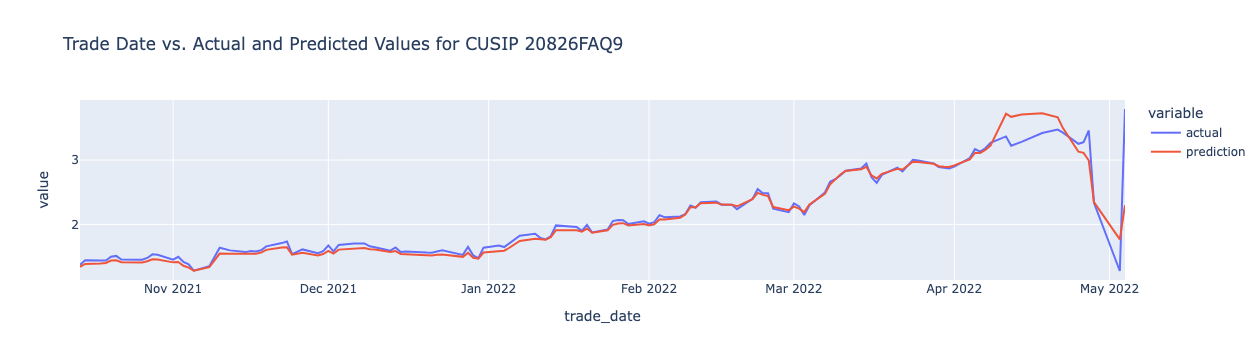

In [75]:

import plotly.express as px

# Assume 'df' is the DataFrame with columns 'cusip_id', 'trade_date', 'prediction', 'actual'

# Select a random 'cusip_id'
random_cusip_id = results_df['cusip_id'].sample(1).iloc[0]

# Filter the DataFrame to only include data for the selected 'cusip_id'
filtered_df = results_df[results_df['cusip_id'] == random_cusip_id]

# Create an interactive plot
fig = px.line(filtered_df, x='trade_date', y=['actual', 'prediction'], title=f'Trade Date vs. Actual and Predicted Values for CUSIP {random_cusip_id}')

# Show the plot
fig.show()


In [70]:
!pip install kaleido

In [71]:
import plotly.io as pio

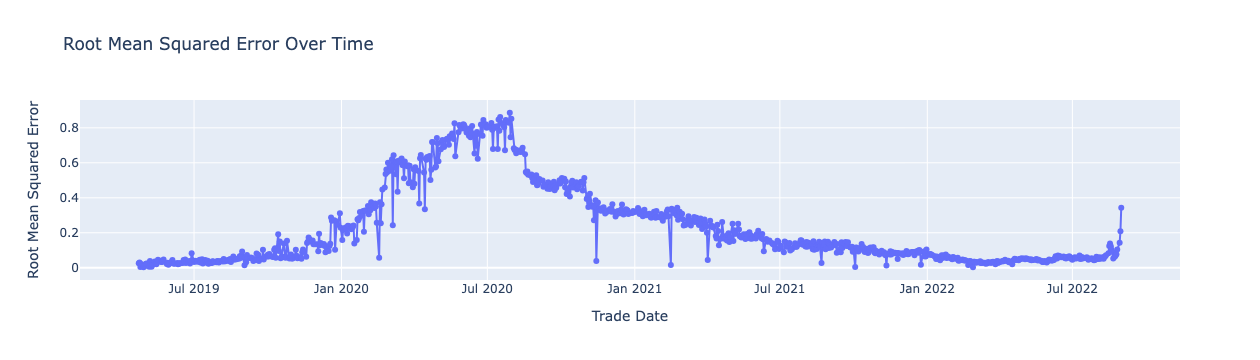

In [73]:
import plotly.graph_objs as go

# sqrt(mean_squared_error(y_valid_true, predictions))
# Group the data by 'trade_date' and calculate the mean squared error for each date
grouped_df = prediction_df.groupby('trade_date').apply(lambda x: sqrt(mean_squared_error(x['actual'], x['prediction'])))

# Create the plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df.values, mode='lines+markers', name='RMSE'))
fig.update_layout(title='Root Mean Squared Error Over Time', xaxis_title='Trade Date', yaxis_title='Root Mean Squared Error')
fig.show()




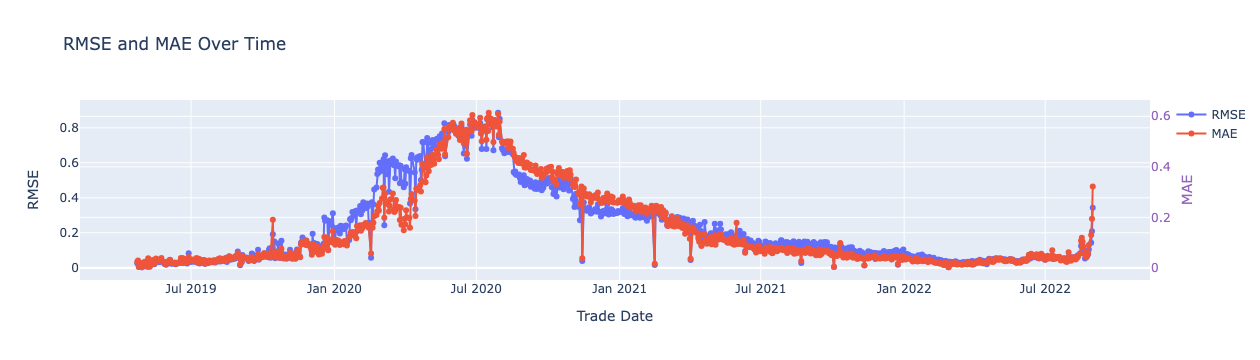

In [74]:


# Group the data by 'trade_date' and calculate the root mean squared error for each date
rmse_grouped = prediction_df.groupby('trade_date').apply(lambda x: sqrt(mean_squared_error(x['actual'], x['prediction'])))

# Group the data by 'trade_date' and calculate the mean absolute error for each date
mae_grouped = prediction_df.groupby('trade_date').apply(lambda x: mean_absolute_error(x['actual'], x['prediction']))

# Create the plot
fig = go.Figure()

# Add RMSE trace
fig.add_trace(go.Scatter(x=rmse_grouped.index, y=rmse_grouped.values, mode='lines+markers', name='RMSE'))

# Add MAE trace
fig.add_trace(go.Scatter(x=mae_grouped.index, y=mae_grouped.values, mode='lines+markers', name='MAE', yaxis='y2'))

# Update the layout to include the additional y-axis for MAE
fig.update_layout(
    title='RMSE and MAE Over Time',
    xaxis_title='Trade Date',
    yaxis_title='RMSE',
    yaxis2=dict(
        title='MAE',
        titlefont=dict(color='rgb(148, 103, 189)'),
        tickfont=dict(color='rgb(148, 103, 189)'),
        overlaying='y',
        side='right',
    )
)

fig.show()


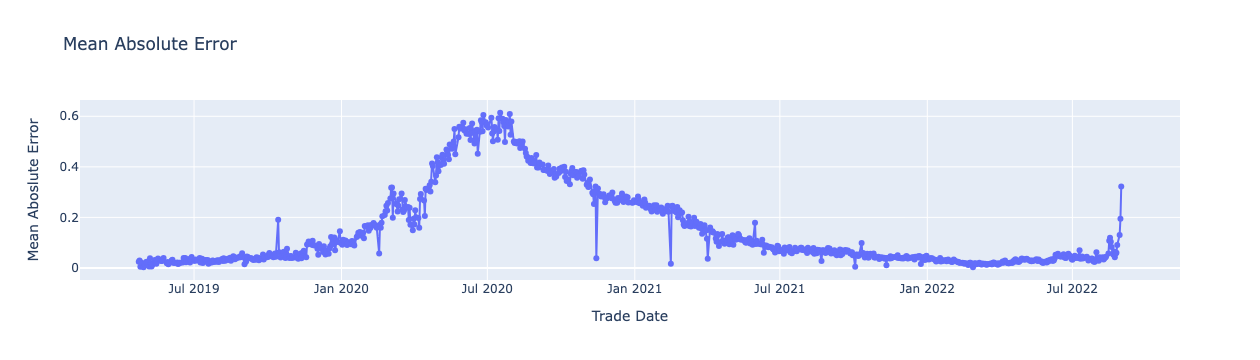

In [57]:
# sqrt(mean_squared_error(y_valid_true, predictions))
# Group the data by 'trade_date' and calculate the mean squared error for each date
grouped_df = prediction_df.groupby('trade_date').apply(lambda x: mean_absolute_error(x['actual'], x['prediction']))

# Create the plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df.values, mode='lines+markers', name='RMSE'))
fig.update_layout(title='Mean Absolute Error', xaxis_title='Trade Date', yaxis_title='Mean Aboslute Error')
fig.show()

In [ ]:

# # Create the scatter plot
# fig = px.scatter(results_df, x='actual', y='prediction', title='Scatter Plot of Predicted vs. Actual Values')
# fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values')
# fig.show()
